In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Replace 'your_file_path' with the actual path to your CSV file
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

In [4]:
print(data.head())  # Display the first few rows
print(data.info())   # Get information about columns and data types
print(data.describe())  # Get summary statistics

   Sl. No.                    Category          Particulars Unit 2017-18  \
0        1         Mulberry Plantation  Mulberry Plantation  ha.  223926   
1        2  Mulberry Cocoon Production            Bivoltine   MT   38945   
2        3  Mulberry Cocoon Production          Cross Breed   MT  122739   
3        4                       Total                Total   MT  161684   
4        5    Mulberry Silk Production            Bivoltine   MT    5874   

  2018-19 2019-20 2020-21 2021-22 2022-23  
0  235001  239967  237578  242277  253182  
1   46458   46295   43885   52328   57879  
2  139102  138848  125460  134913  141873  
3  185560  185143  169345  187241  199752  
4    6987    7009    6783    7941    8904  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sl. No.      34 non-null     int64 
 1   Category     34 non-null     object
 2   Particu

In [59]:
data.columns

Index(['Sl. No.', 'Category', 'Particulars', 'Unit', '2017-18', '2018-19',
       '2019-20', '2020-21', '2021-22', '2022-23'],
      dtype='object')

In [60]:


# Print the desired columns
print(data[['Category', 'Particulars', 'Unit']])

                       Category                    Particulars          Unit
0           Mulberry Plantation            Mulberry Plantation           ha.
1    Mulberry Cocoon Production                      Bivoltine            MT
2    Mulberry Cocoon Production                    Cross Breed            MT
3                         Total                          Total            MT
4      Mulberry Silk Production                      Bivoltine            MT
5      Mulberry Silk Production                   Multivoltine            MT
6                         Total                          Total            MT
7                    Vanya Silk           Tasar Reeling Cocoon      Lakh No.
8                    Vanya Silk                Tasar Silk Yarn            MT
9                    Vanya Silk                 Eri Cut Cocoon            MT
10                   Vanya Silk                  Eri Spun Yarn            MT
11                   Vanya Silk            Muga Reeling Cocoon      Lakh No.

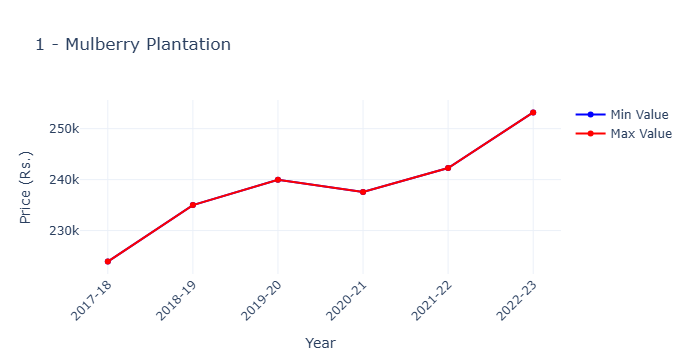

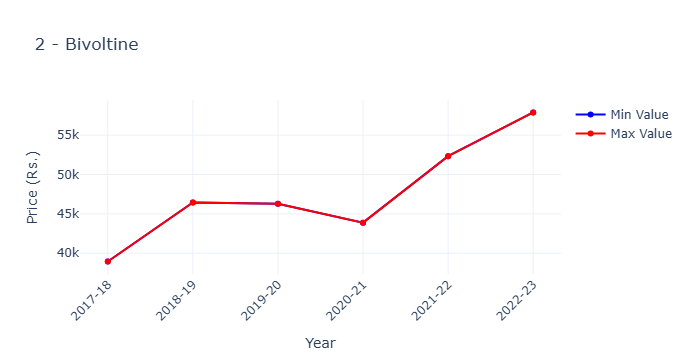

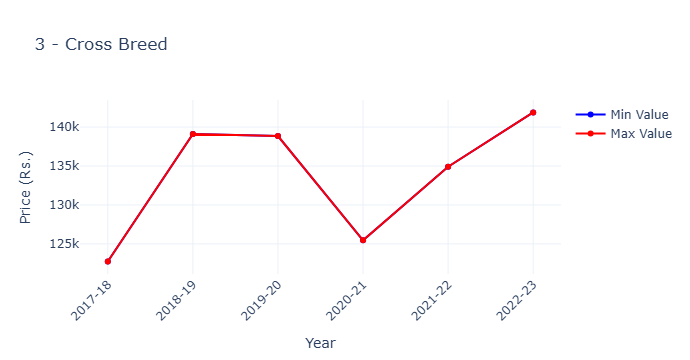

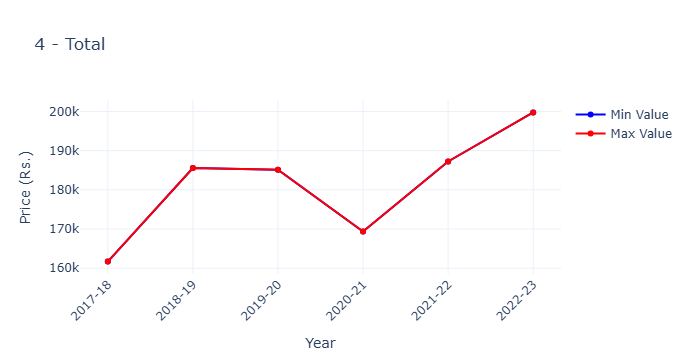

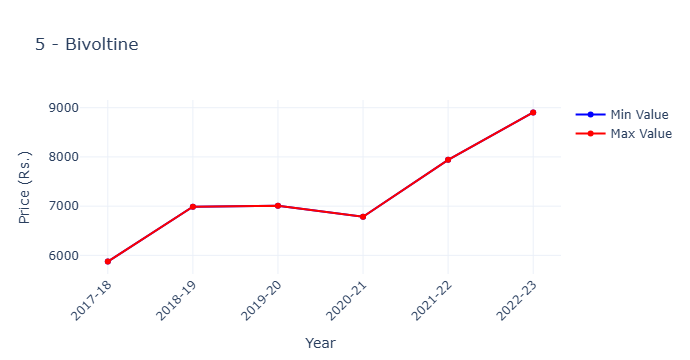

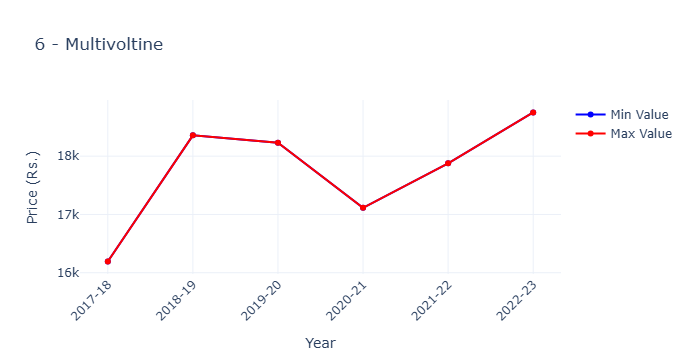

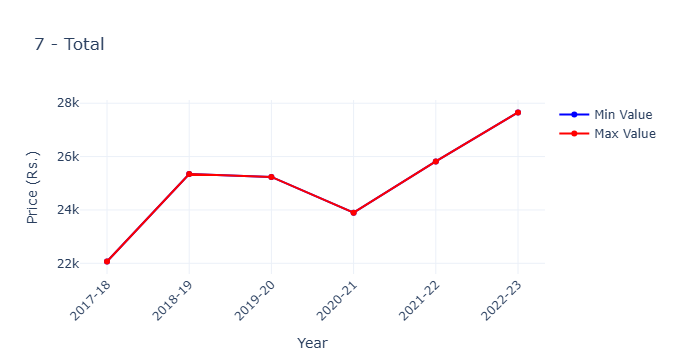

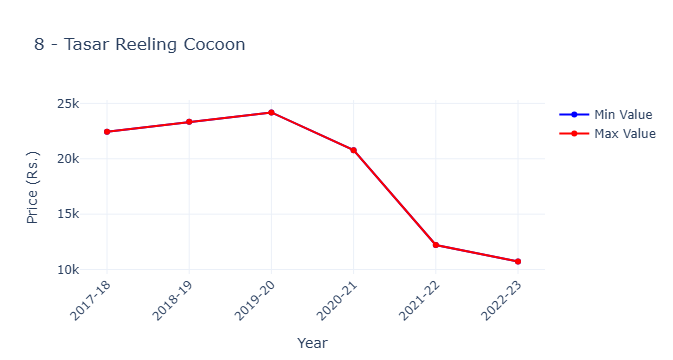

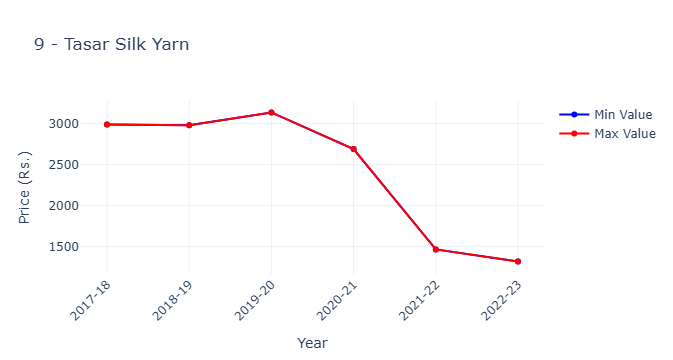

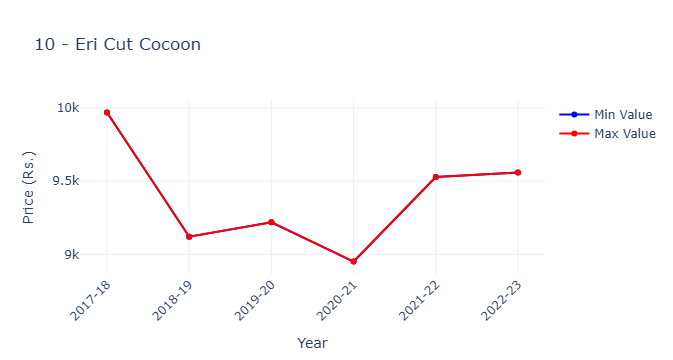

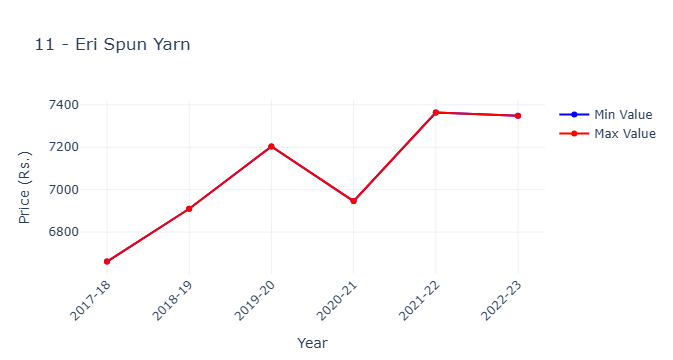

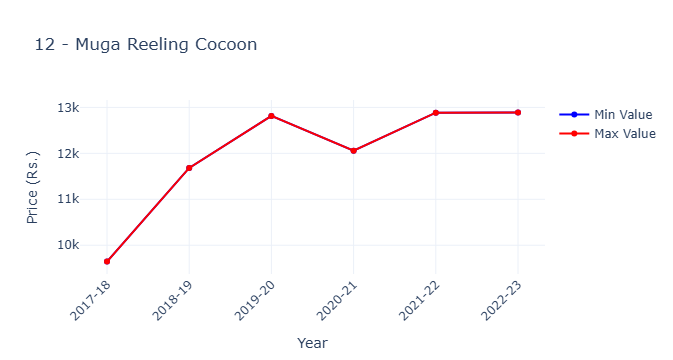

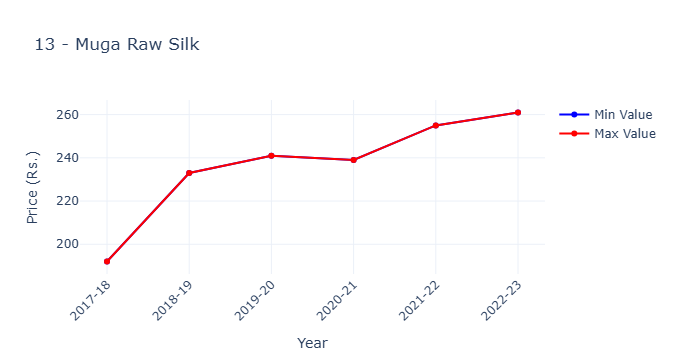

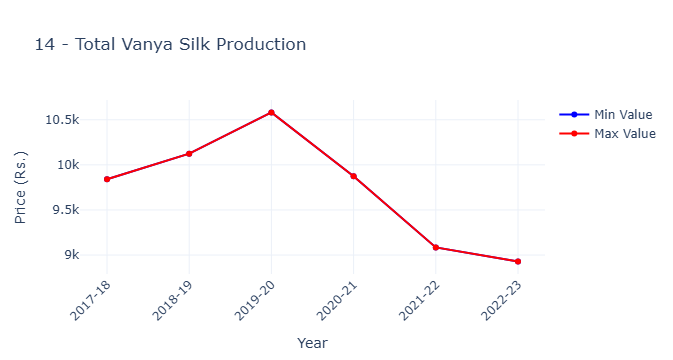

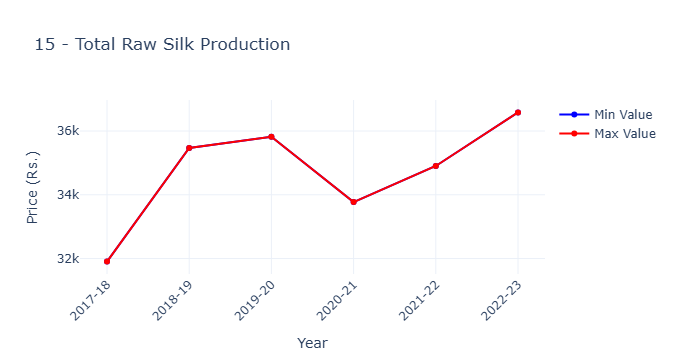

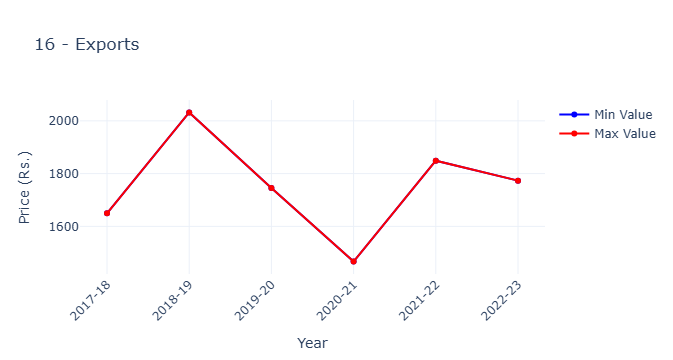

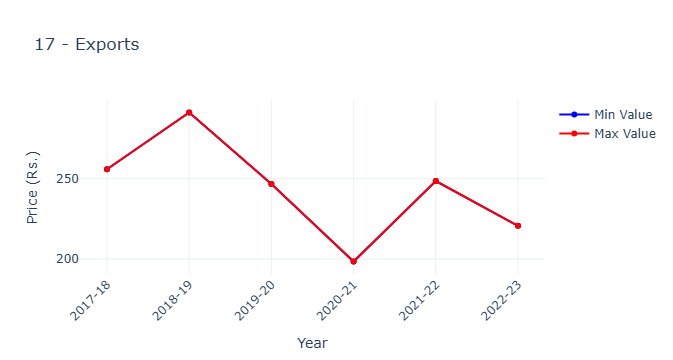

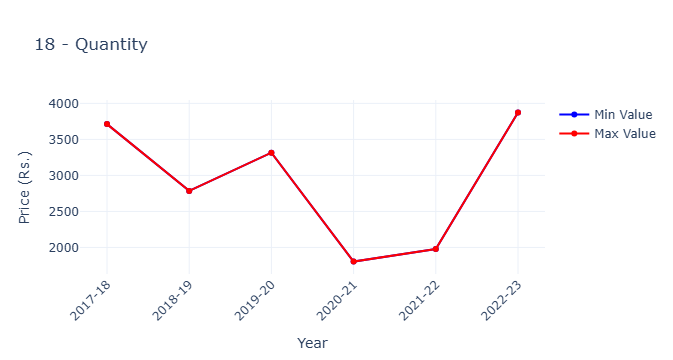

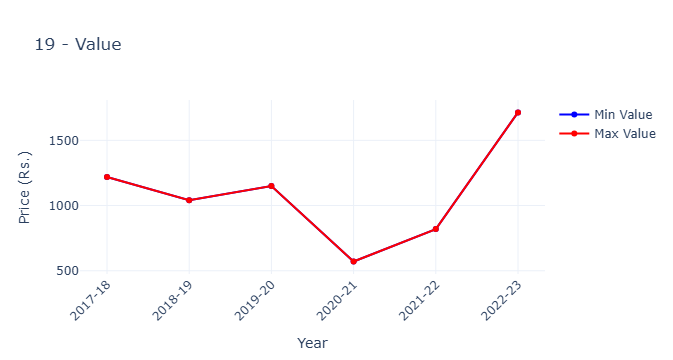

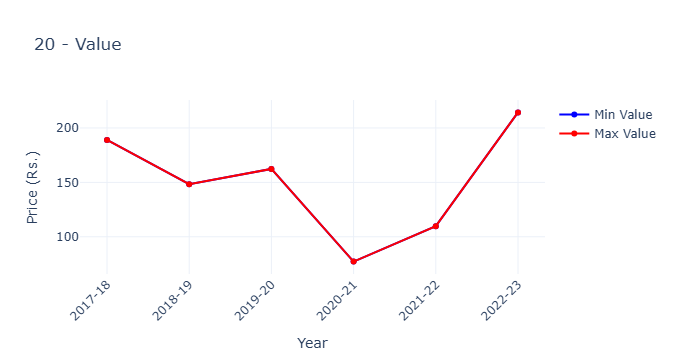

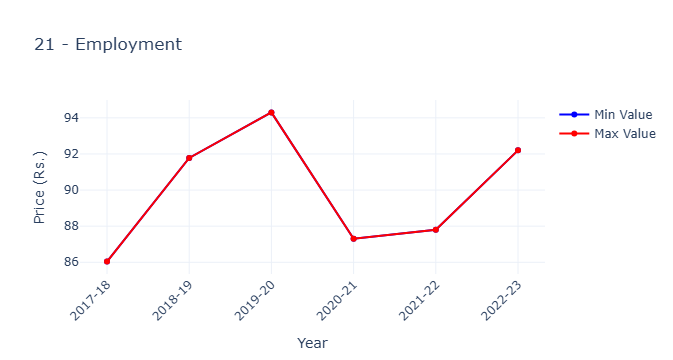

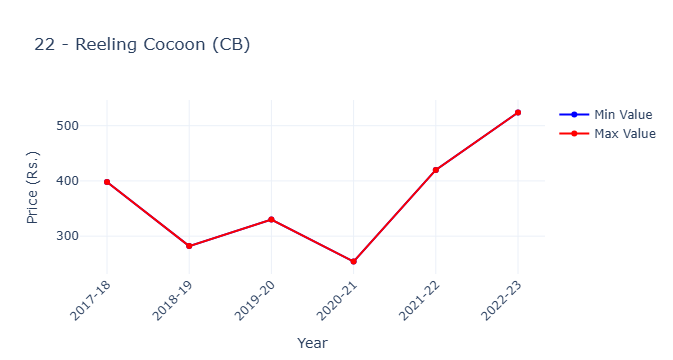

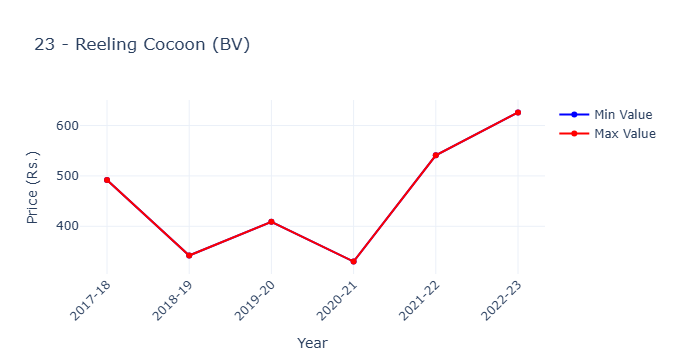

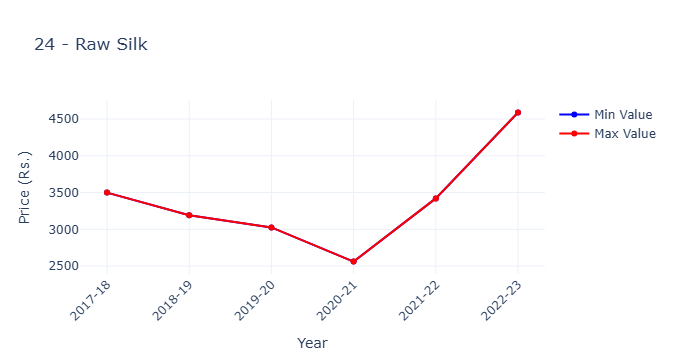

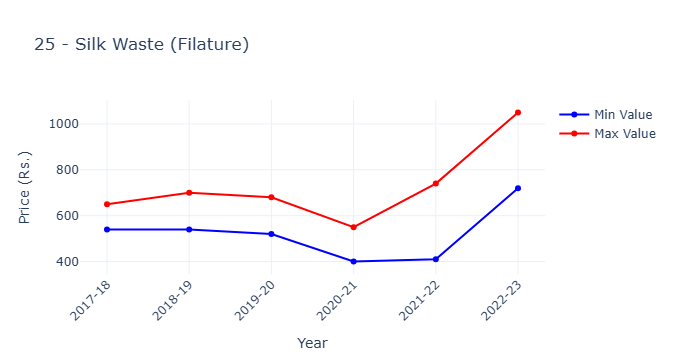

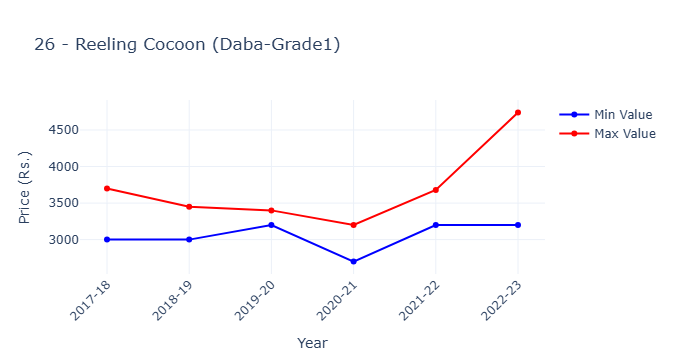

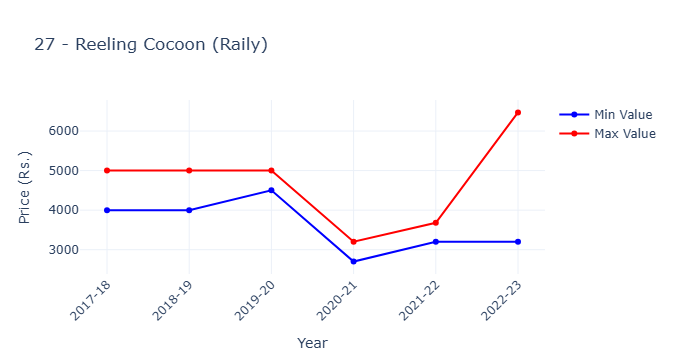

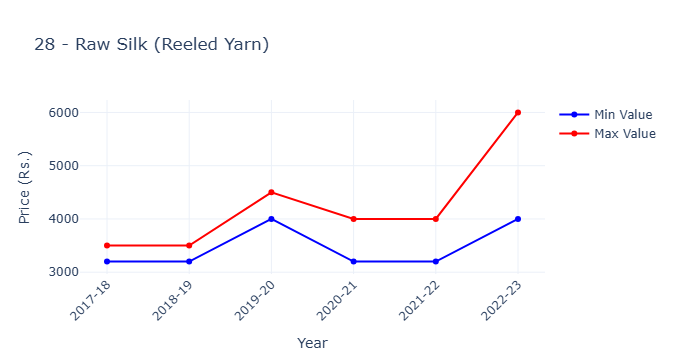

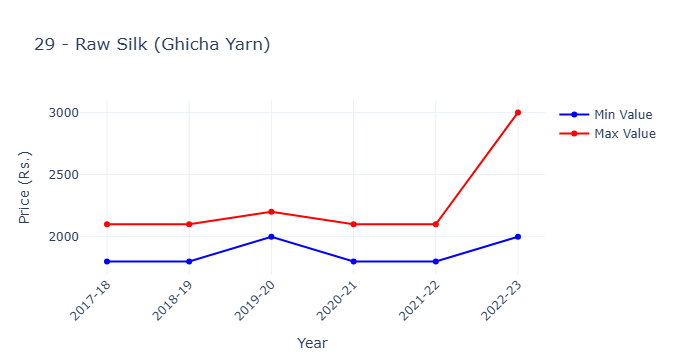

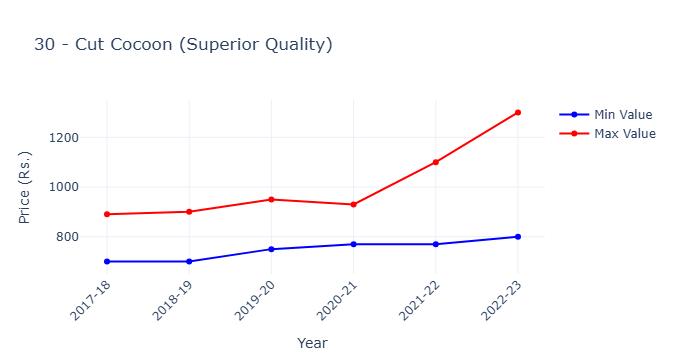

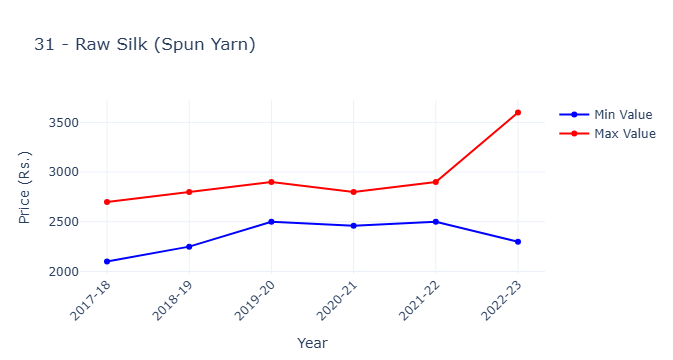

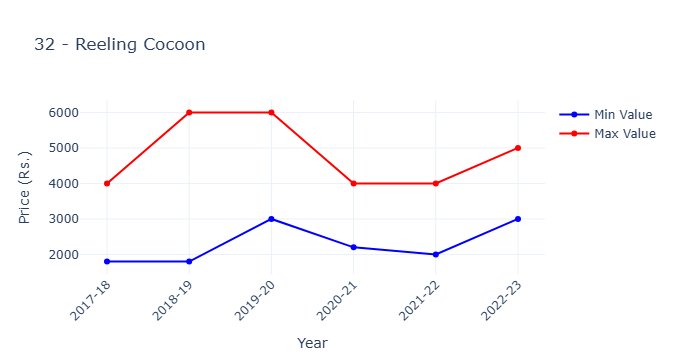

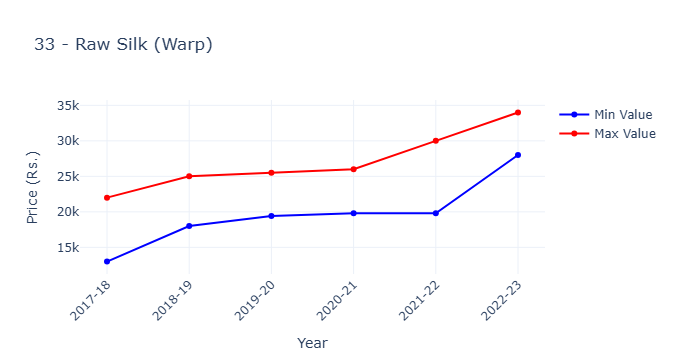

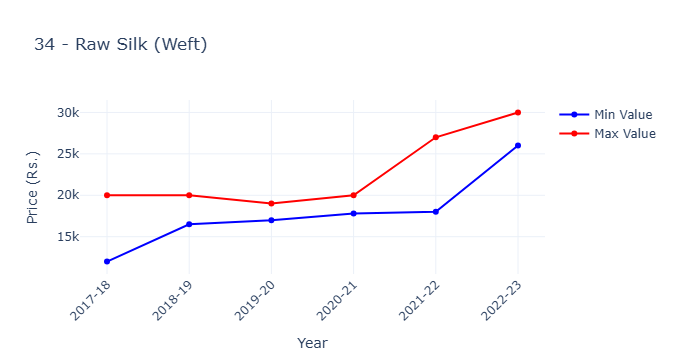

In [161]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Function to split the range into min and max
def split_range(range_str):
    try:
        min_val, max_val = range_str.split('-')
        return float(min_val), float(max_val)
    except ValueError:
        # Handle cases where range_str might be a single value
        return float(range_str), float(range_str)

# List of year columns
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Prepare to store plots
plots = []

# Iterate through each row and create a plot
for index, row in data.iterrows():
    # Split ranges into min and max values for each year
    min_values = []
    max_values = []
    for col in year_columns:
        min_val, max_val = split_range(row[col])
        min_values.append(min_val)
        max_values.append(max_val)
    
    # Create traces for min and max values
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=year_columns, y=min_values, mode='lines+markers', name='Min Value', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=year_columns, y=max_values, mode='lines+markers', name='Max Value', line=dict(color='red')))
    
    # Update layout for each plot
    fig.update_layout(
        title=f"{row['Sl. No.']} - {row['Particulars']}",
        xaxis_title='Year',
        yaxis_title='Price (Rs.)',
        xaxis=dict(tickangle=-45),
        template='plotly_white'
    )
    
    # Save the plot
    plots.append(fig)

# Display all plots
for plot in plots:
    plot.show()



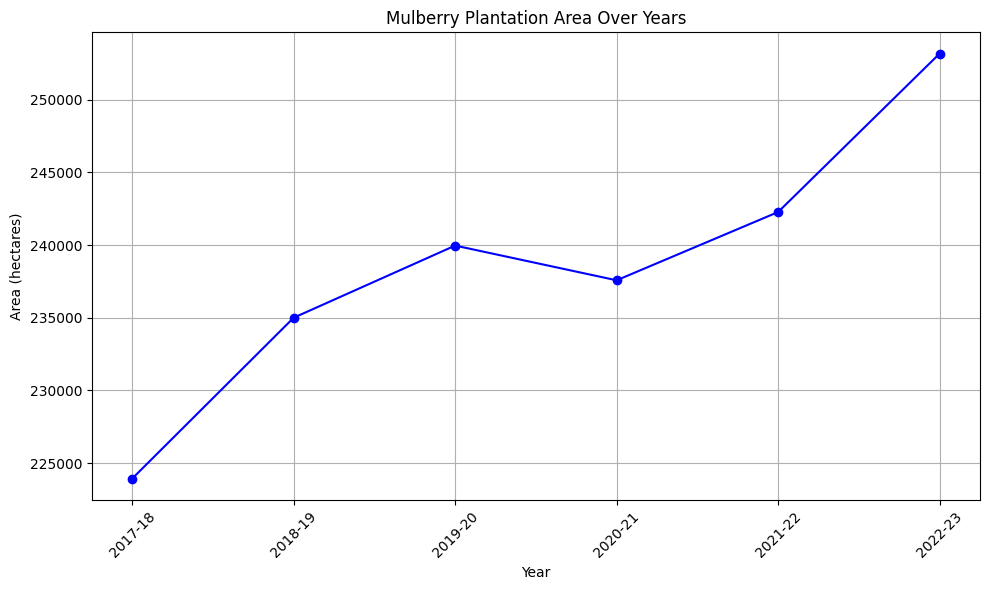

In [61]:
# Filter data for Mulberry Plantation
mulberry_plantation_data = data[data['Category'] == 'Mulberry Plantation']

# Extract year columns and corresponding values
years = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
values = mulberry_plantation_data[years].iloc[0].values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='b')
plt.title('Mulberry Plantation Area Over Years')
plt.xlabel('Year')
plt.ylabel('Area (hectares)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


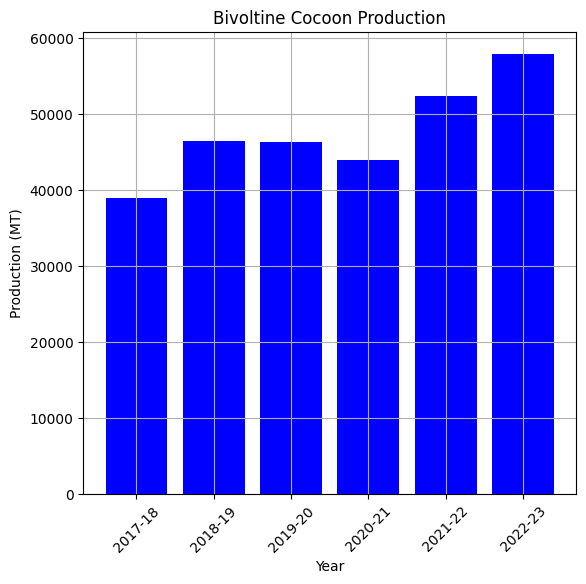

In [62]:
# Filter data for Mulberry Cocoon Production - Bivoltine
bivoltine_data = data[(data['Category'] == 'Mulberry Cocoon Production') & (data['Particulars'] == 'Bivoltine')]

# Extract year columns and corresponding values
bivoltine_values = bivoltine_data[years].iloc[0].values

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(years, bivoltine_values, color='blue')
plt.title('Bivoltine Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)


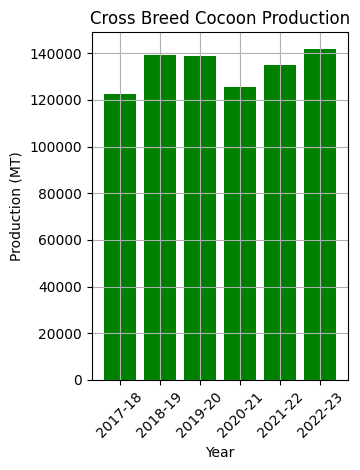

In [63]:
# Filter data for Mulberry Cocoon Production - Cross Breed
cross_breed_data = data[(data['Category'] == 'Mulberry Cocoon Production') & (data['Particulars'] == 'Cross Breed')]

# Extract year columns and corresponding values
cross_breed_values = cross_breed_data[years].iloc[0].values

# Plotting
plt.subplot(1, 2, 2)
plt.bar(years, cross_breed_values, color='green')
plt.title('Cross Breed Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


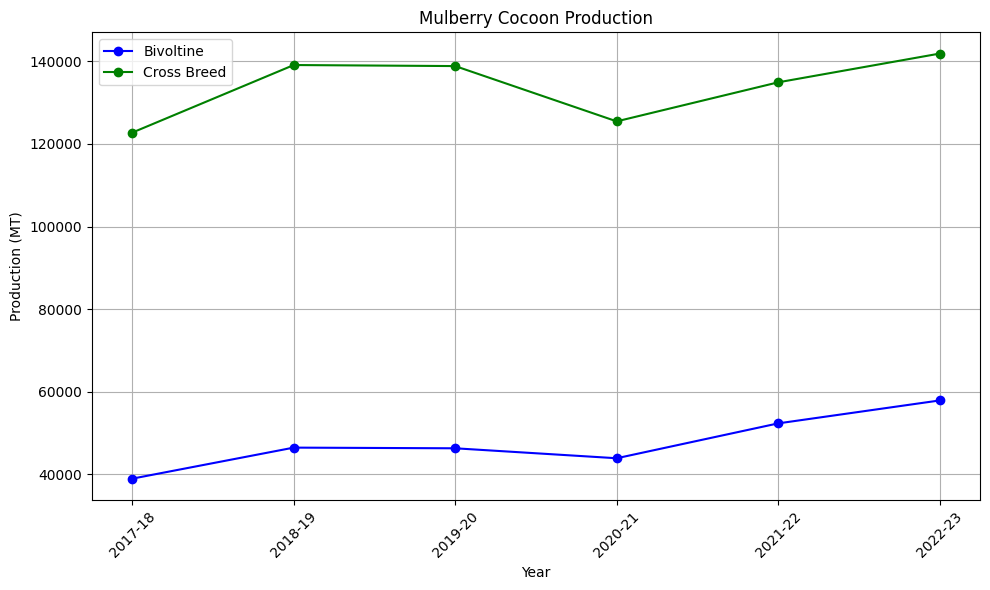

In [64]:
# Plotting combined graph
plt.figure(figsize=(10, 6))

plt.plot(years, bivoltine_values, marker='o', linestyle='-', color='blue', label='Bivoltine')
plt.plot(years, cross_breed_values, marker='o', linestyle='-', color='green', label='Cross Breed')

plt.title('Mulberry Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


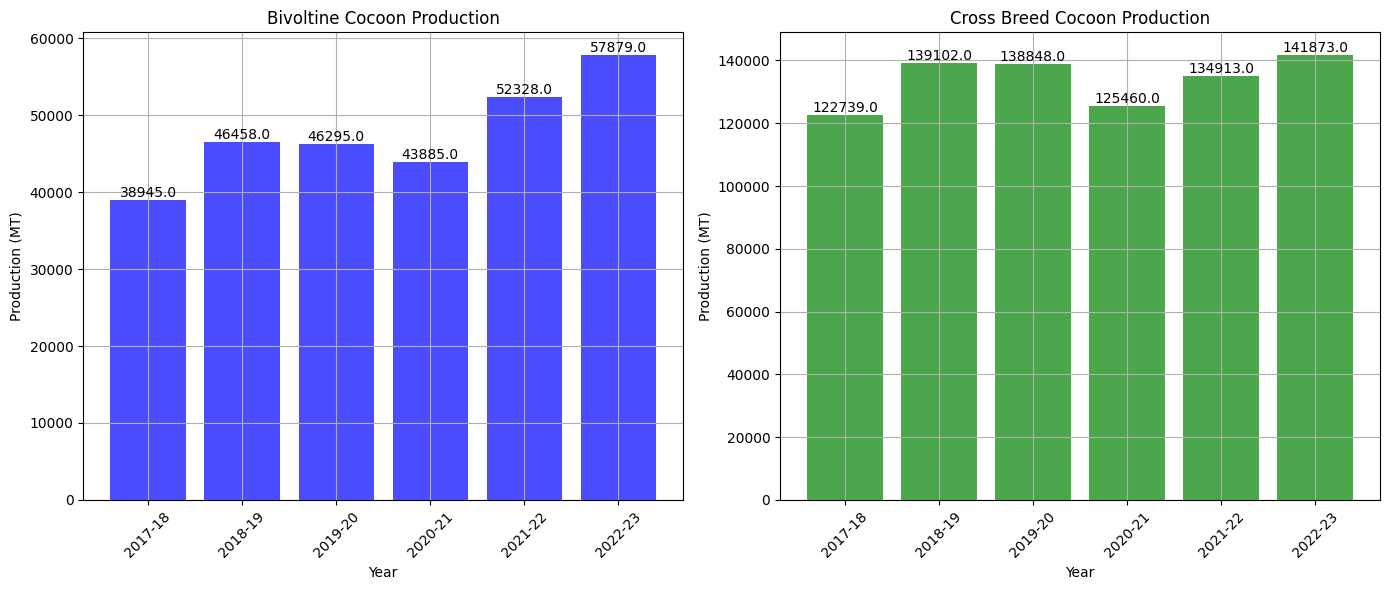

In [65]:
import matplotlib.pyplot as plt

# Plotting Bivoltine Bar Chart with Annotations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_bivoltine = plt.bar(years, bivoltine_values, color='blue', alpha=0.7)
plt.title('Bivoltine Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations
for bar in bars_bivoltine:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Plotting Cross Breed Bar Chart with Annotations
plt.subplot(1, 2, 2)
bars_cross_breed = plt.bar(years, cross_breed_values, color='green', alpha=0.7)
plt.title('Cross Breed Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)

# Adding annotations
for bar in bars_cross_breed:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


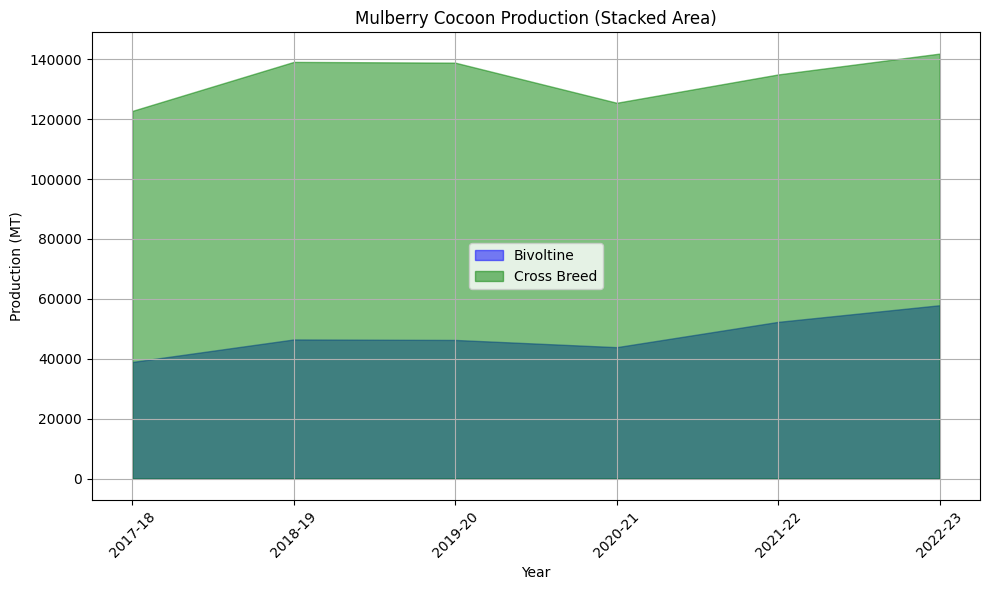

In [66]:
import matplotlib.pyplot as plt

# Plotting Stacked Area Chart
plt.figure(figsize=(10, 6))

plt.fill_between(years, bivoltine_values, color='blue', alpha=0.5, label='Bivoltine')
plt.fill_between(years, cross_breed_values, color='green', alpha=0.5, label='Cross Breed', where=(cross_breed_values > 0))

plt.title('Mulberry Cocoon Production (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


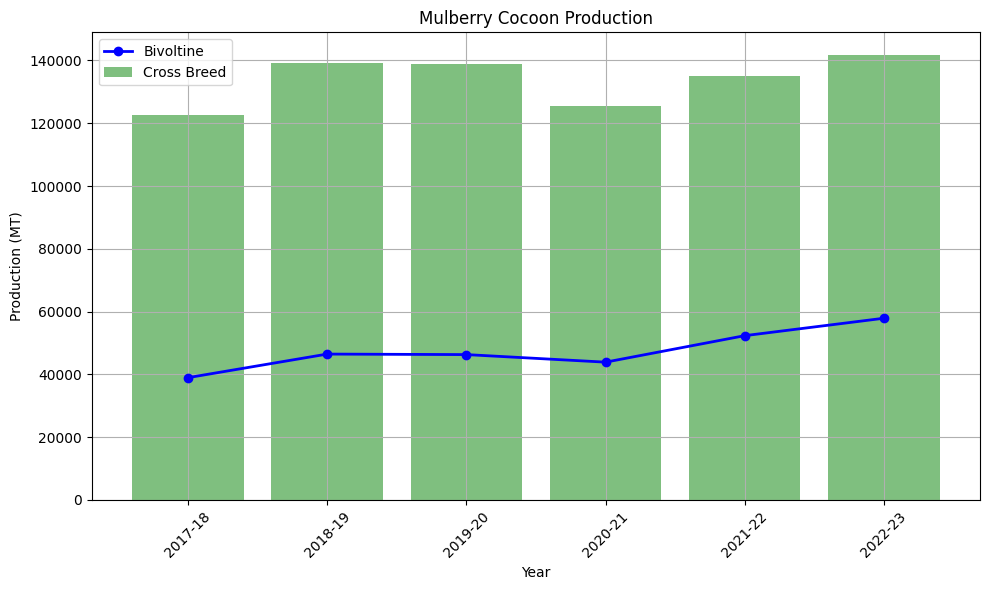

In [67]:
import matplotlib.pyplot as plt

# Plotting Combined Graph with Different Styles
plt.figure(figsize=(10, 6))

# Line plot for Bivoltine
plt.plot(years, bivoltine_values, marker='o', linestyle='-', color='blue', label='Bivoltine', linewidth=2)

# Bar plot for Cross Breed
plt.bar(years, cross_breed_values, color='green', alpha=0.5, label='Cross Breed')

plt.title('Mulberry Cocoon Production')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


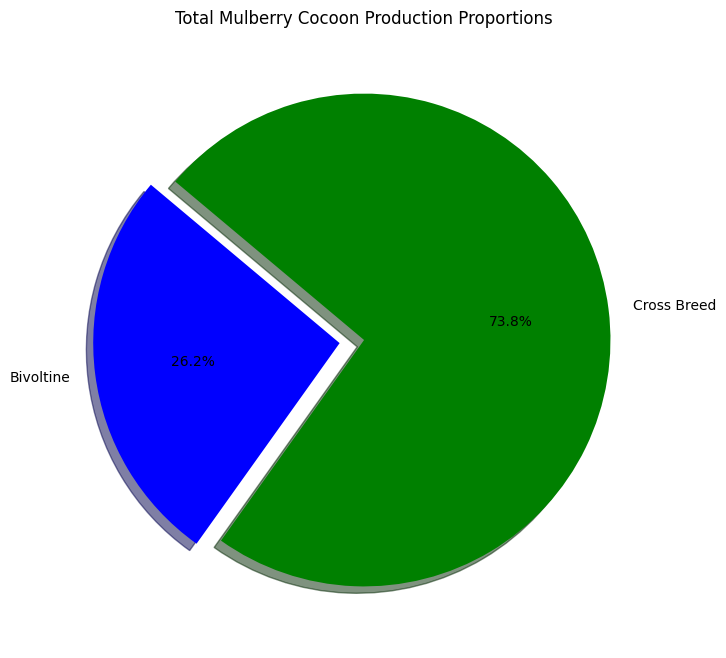

In [68]:
import matplotlib.pyplot as plt

# Calculate total production over all years for Bivoltine and Cross Breed
total_bivoltine = bivoltine_data[years].sum(axis=1).values[0]
total_cross_breed = cross_breed_data[years].sum(axis=1).values[0]

# Data for pie chart
total_sizes = [total_bivoltine, total_cross_breed]
total_labels = ['Bivoltine', 'Cross Breed']
total_colors = ['blue', 'green']
total_explode = (0.1, 0)  # explode 1st slice (Bivoltine)

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(total_sizes, explode=total_explode, labels=total_labels, colors=total_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Mulberry Cocoon Production Proportions')
plt.show()


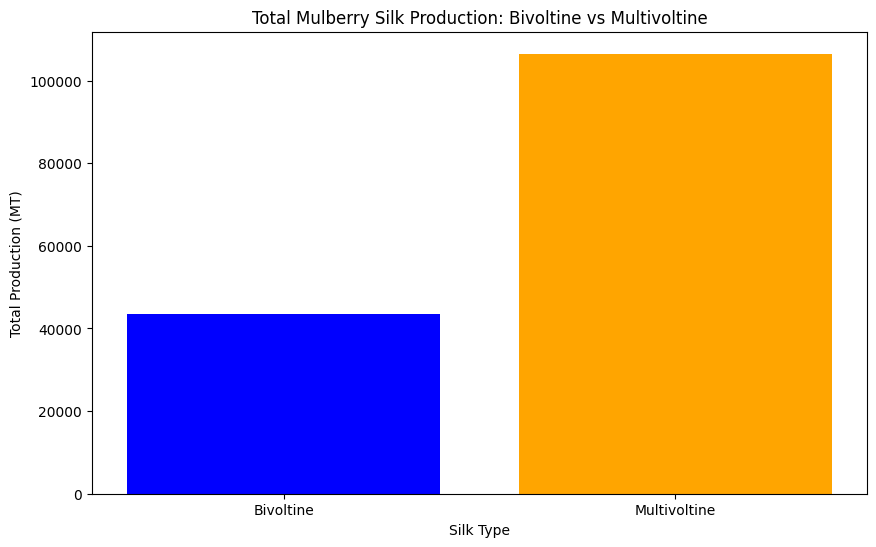

In [69]:
import matplotlib.pyplot as plt

# Filter data for Mulberry Silk Production - Bivoltine and Multivoltine
bivoltine_silk_data = data[(data['Category'] == 'Mulberry Silk Production') & (data['Particulars'] == 'Bivoltine')]
multivoltine_silk_data = data[(data['Category'] == 'Mulberry Silk Production') & (data['Particulars'] == 'Multivoltine')]

# Sum the production values across all years for each type
bivoltine_silk_total = bivoltine_silk_data[year_columns].sum(axis=1).values[0]
multivoltine_silk_total = multivoltine_silk_data[year_columns].sum(axis=1).values[0]

# Plotting Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(['Bivoltine', 'Multivoltine'], [bivoltine_silk_total, multivoltine_silk_total], color=['blue', 'orange'])
plt.xlabel('Silk Type')
plt.ylabel('Total Production (MT)')
plt.title('Total Mulberry Silk Production: Bivoltine vs Multivoltine')
plt.show()


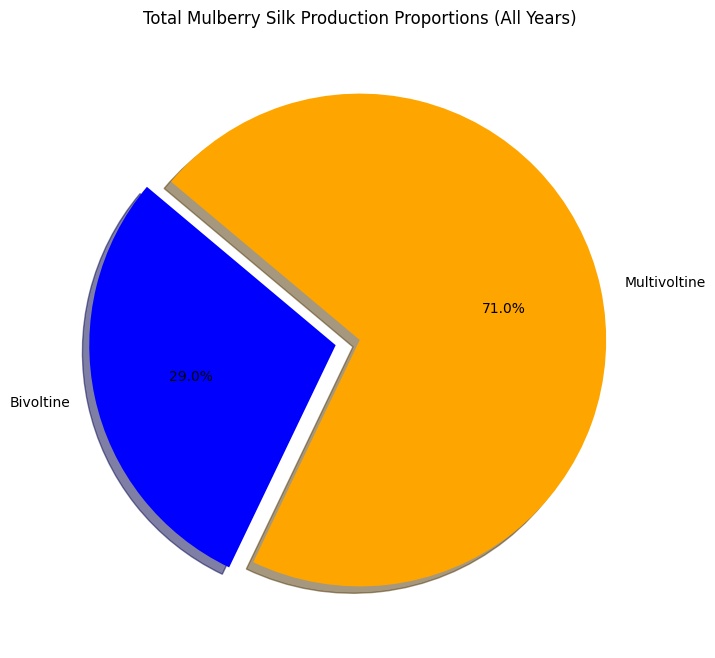

In [70]:
import matplotlib.pyplot as plt

# Data for pie chart
silk_sizes = [bivoltine_silk_total, multivoltine_silk_total]
silk_labels = ['Bivoltine', 'Multivoltine']
silk_colors = ['blue', 'orange']
silk_explode = (0.1, 0)  # explode 1st slice (Bivoltine)

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(silk_sizes, explode=silk_explode, labels=silk_labels, colors=silk_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Mulberry Silk Production Proportions (All Years)')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

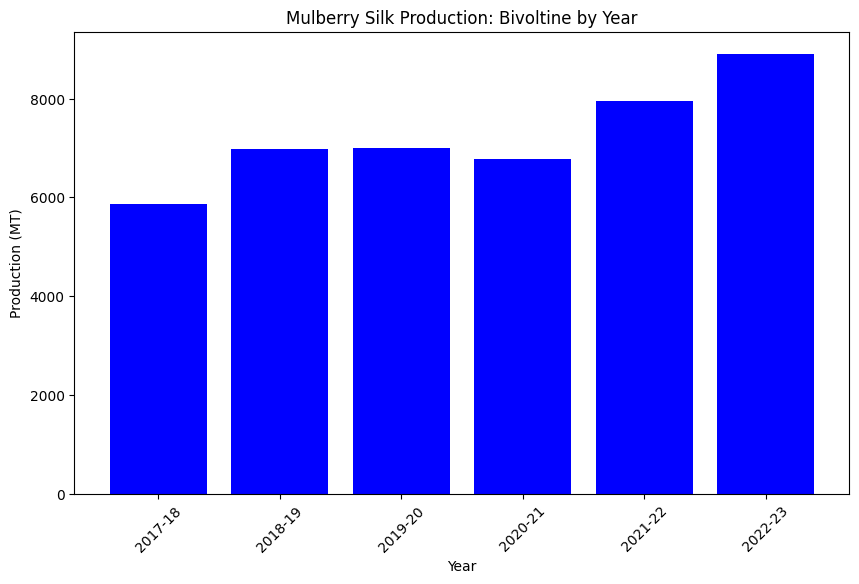

In [71]:
import matplotlib.pyplot as plt

# Filter data for Bivoltine Mulberry Silk Production
bivoltine_silk_data = data[(data['Category'] == 'Mulberry Silk Production') & (data['Particulars'] == 'Bivoltine')]

# Extract and sum production values across all years for Bivoltine
bivoltine_silk_total = bivoltine_silk_data[year_columns].sum(axis=1).values[0]

# Plotting Bar Chart for Bivoltine
plt.figure(figsize=(10, 6))
plt.bar(year_columns, bivoltine_silk_data[year_columns].values.flatten(), color='blue')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.title('Mulberry Silk Production: Bivoltine by Year')
plt.xticks(rotation=45)
plt.show


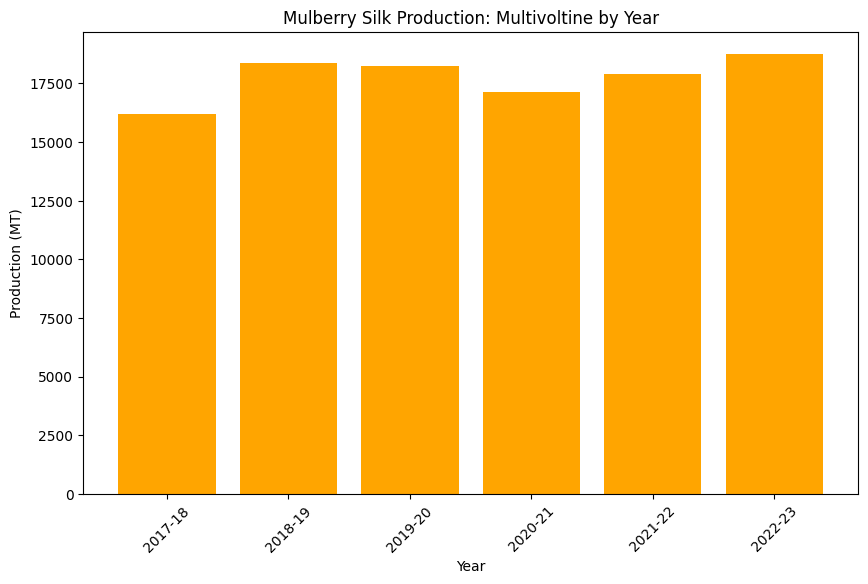

In [72]:
# Filter data for Multivoltine Mulberry Silk Production
multivoltine_silk_data = data[(data['Category'] == 'Mulberry Silk Production') & (data['Particulars'] == 'Multivoltine')]

# Extract and sum production values across all years for Multivoltine
multivoltine_silk_total = multivoltine_silk_data[year_columns].sum(axis=1).values[0]

# Plotting Bar Chart for Multivoltine
plt.figure(figsize=(10, 6))
plt.bar(year_columns, multivoltine_silk_data[year_columns].values.flatten(), color='orange')
plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.title('Mulberry Silk Production: Multivoltine by Year')
plt.xticks(rotation=45)
plt.show()


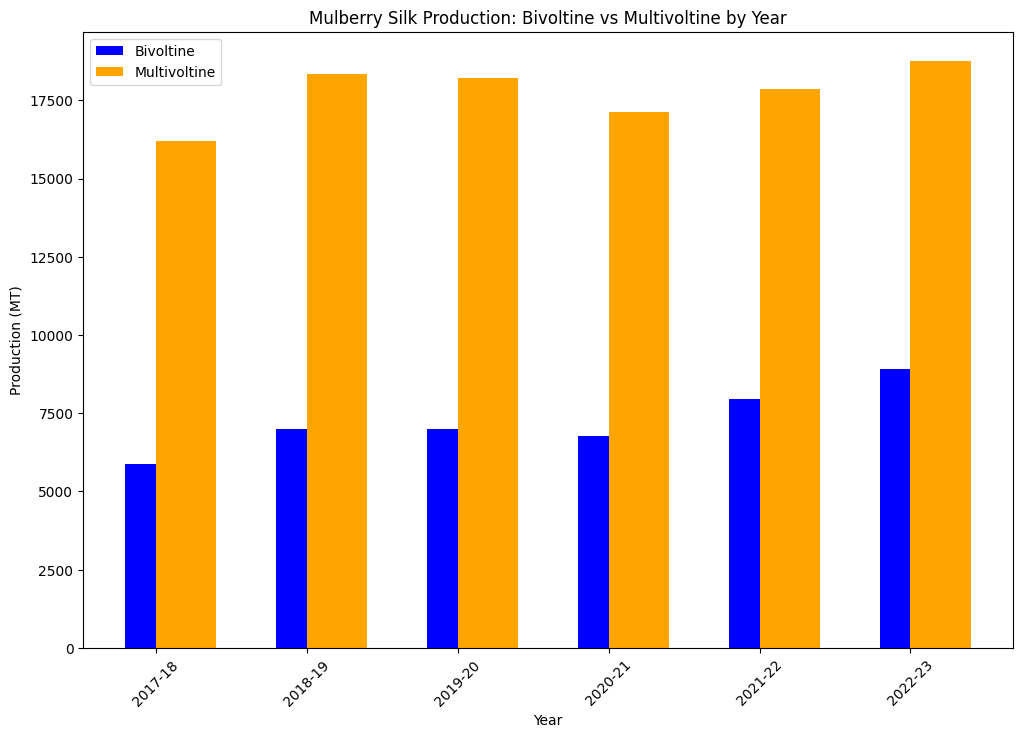

In [73]:
# Extract production values for both Bivoltine and Multivoltine
bivoltine_values = bivoltine_silk_data[year_columns].values.flatten()
multivoltine_values = multivoltine_silk_data[year_columns].values.flatten()

# Plotting Combined Bar Chart
plt.figure(figsize=(12, 8))

# Plotting Bivoltine Bars
plt.bar(year_columns, bivoltine_values, width=0.4, label='Bivoltine', color='blue', align='center')

# Plotting Multivoltine Bars with slight offset
plt.bar(year_columns, multivoltine_values, width=0.4, label='Multivoltine', color='orange', align='edge')

plt.xlabel('Year')
plt.ylabel('Production (MT)')
plt.title('Mulberry Silk Production: Bivoltine vs Multivoltine by Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()


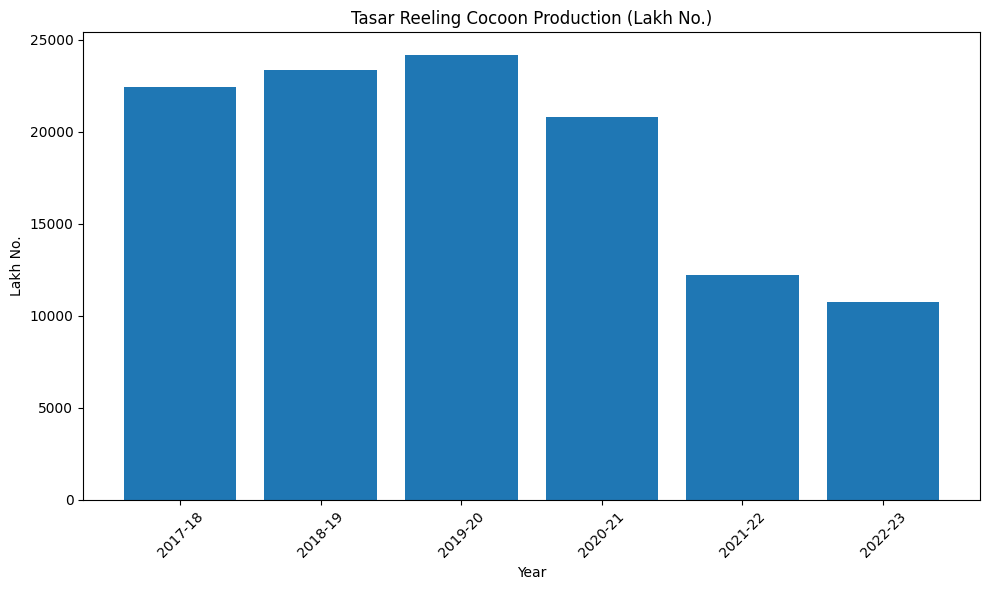

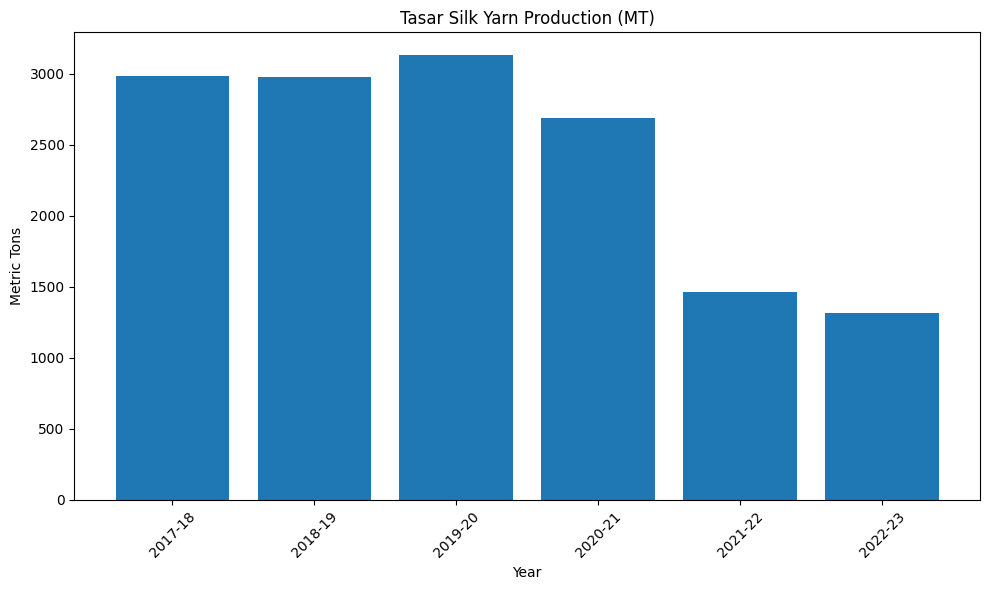

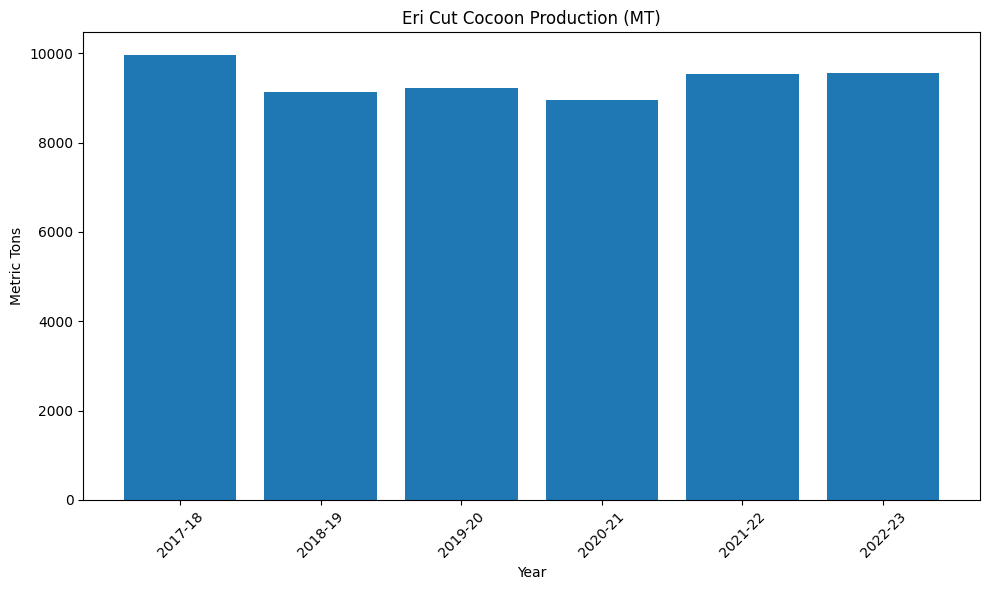

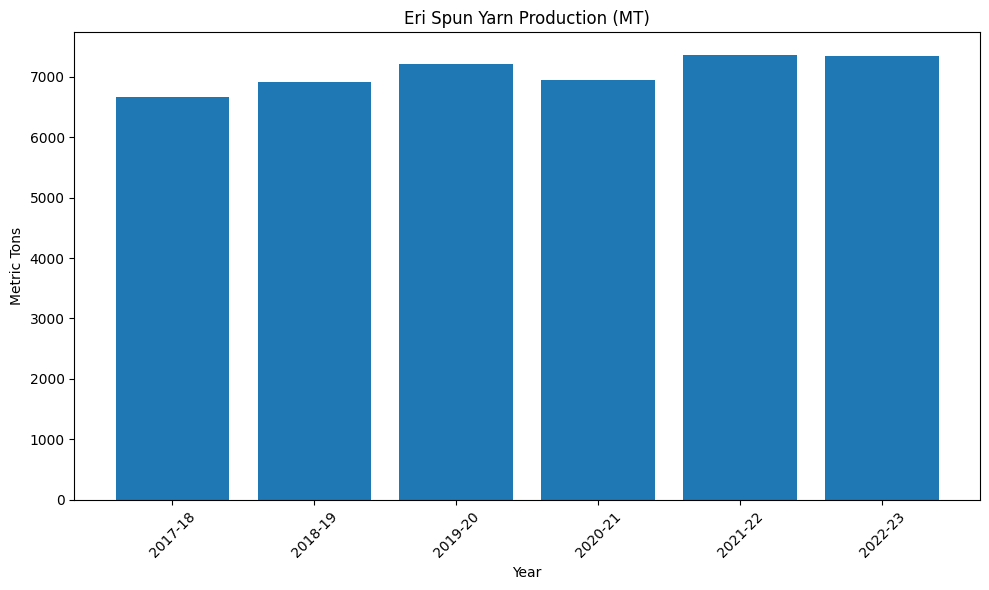

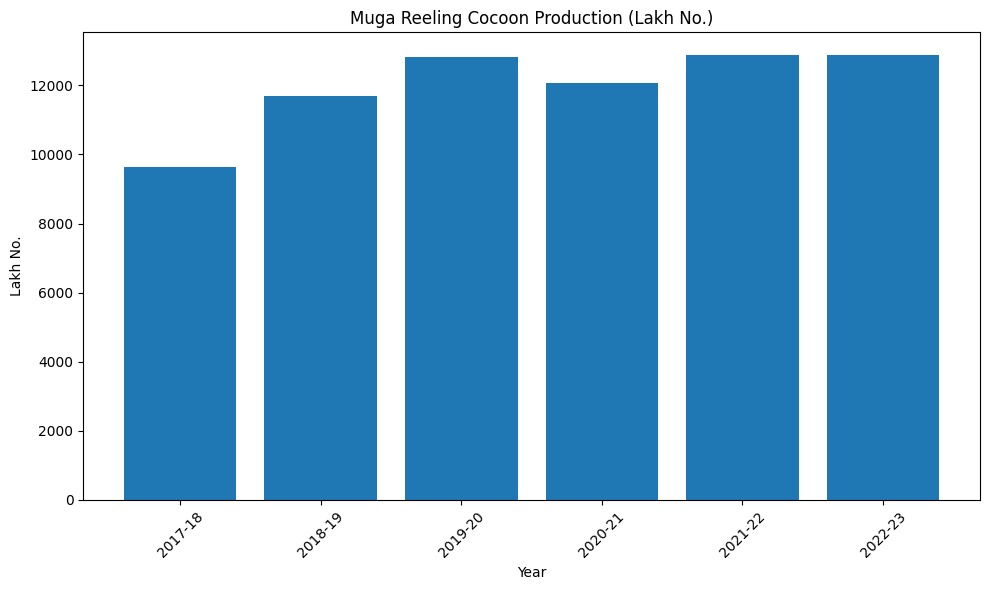

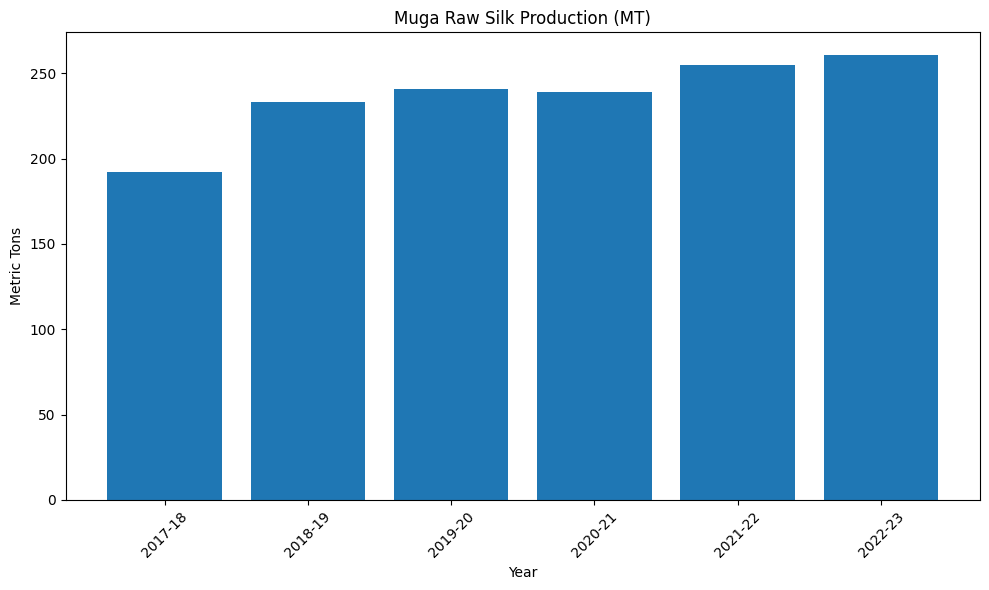

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have read your dataset and it’s named `data`

# Filter data for each category
tasar_reeling_cocoon = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Tasar Reeling Cocoon')]
tasar_silk_yarn = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Tasar Silk Yarn')]
eri_cut_cocoon = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Eri Cut Cocoon')]
eri_spun_yarn = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Eri Spun Yarn')]
muga_reeling_cocoon = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Muga Reeling Cocoon')]
muga_raw_silk = data[(data['Category'] == 'Vanya Silk') & (data['Particulars'] == 'Muga Raw Silk')]

# Define a function to plot bar charts
def plot_bar_chart(df, title, y_label, file_name):
    # Filter out columns to keep only year columns
    df_years = df[['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']]
    # Sum values across rows to aggregate data by year
    df_sum = df_years.sum()
    plt.figure(figsize=(10, 6))
    plt.bar(df_sum.index, df_sum.values)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

# Plot each chart separately
plot_bar_chart(tasar_reeling_cocoon, 'Tasar Reeling Cocoon Production (Lakh No.)', 'Lakh No.', 'tasar_reeling_cocoon.png')
plot_bar_chart(tasar_silk_yarn, 'Tasar Silk Yarn Production (MT)', 'Metric Tons', 'tasar_silk_yarn.png')
plot_bar_chart(eri_cut_cocoon, 'Eri Cut Cocoon Production (MT)', 'Metric Tons', 'eri_cut_cocoon.png')
plot_bar_chart(eri_spun_yarn, 'Eri Spun Yarn Production (MT)', 'Metric Tons', 'eri_spun_yarn.png')
plot_bar_chart(muga_reeling_cocoon, 'Muga Reeling Cocoon Production (Lakh No.)', 'Lakh No.', 'muga_reeling_cocoon.png')
plot_bar_chart(muga_raw_silk, 'Muga Raw Silk Production (MT)', 'Metric Tons', 'muga_raw_silk.png')


In [77]:
# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Convert 'Year' column to datetime format
data_long['Year'] = pd.to_datetime(data_long['Year'].astype(str), format='%Y-%y', errors='coerce')


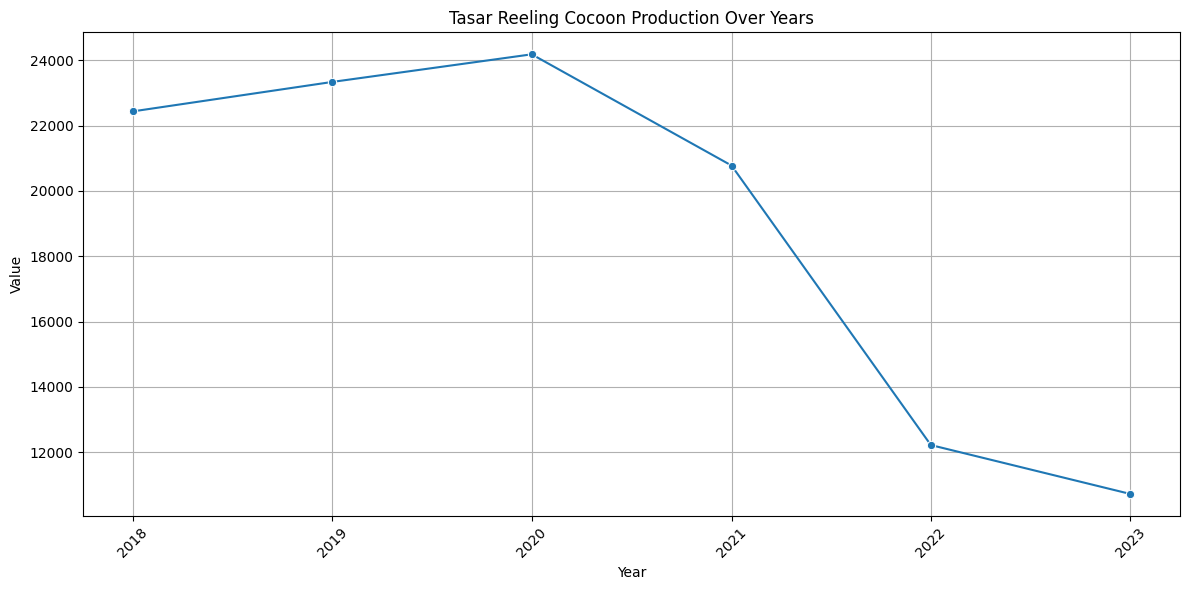

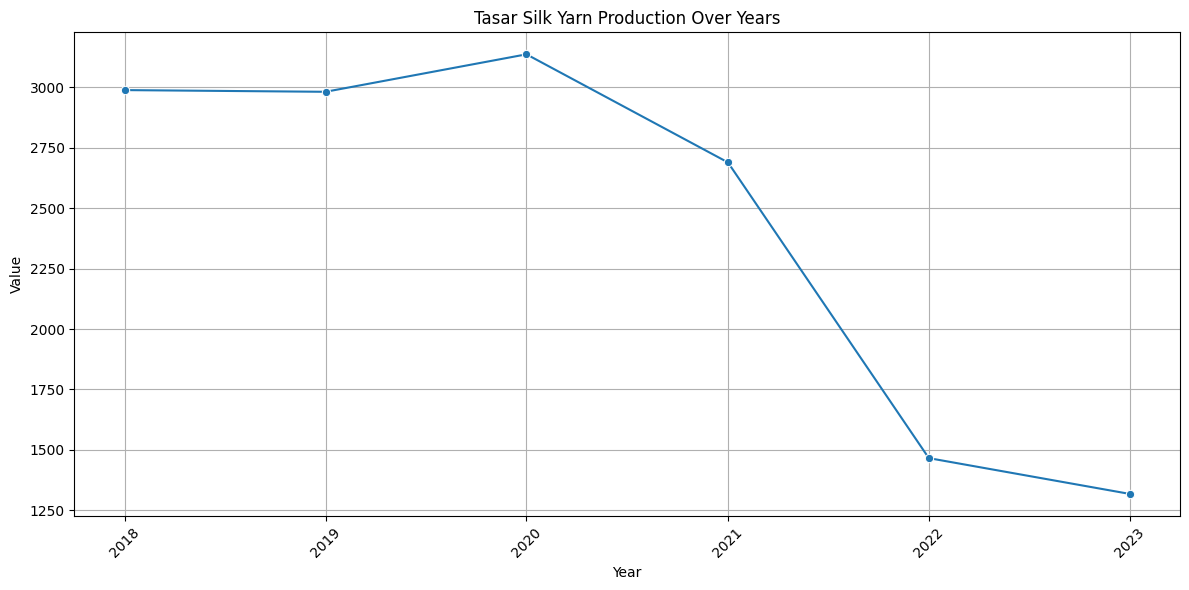

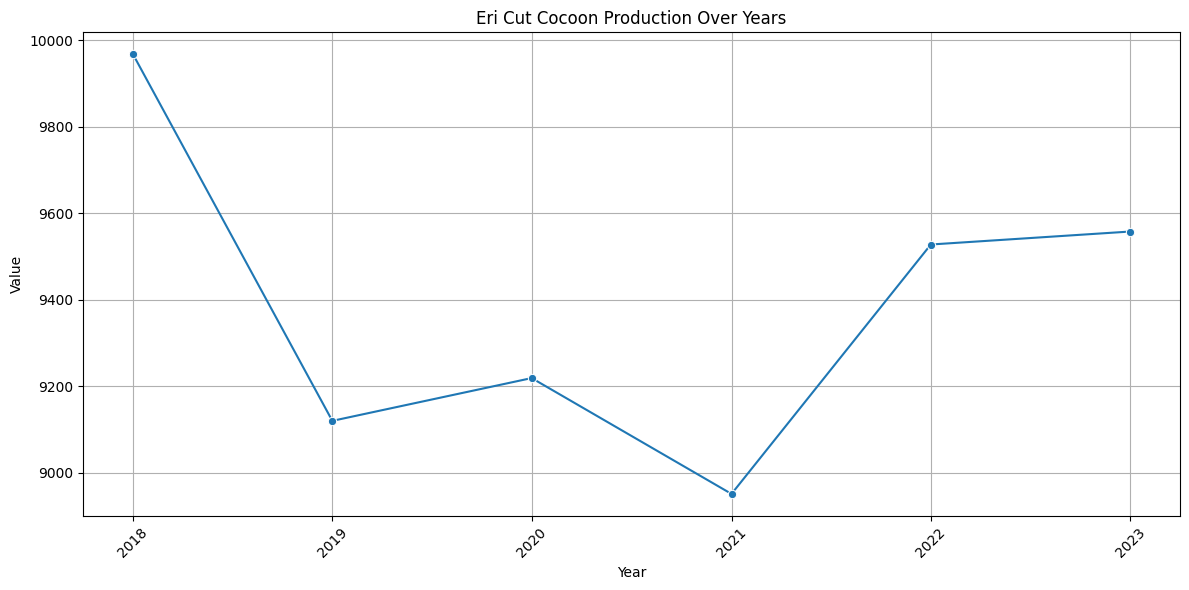

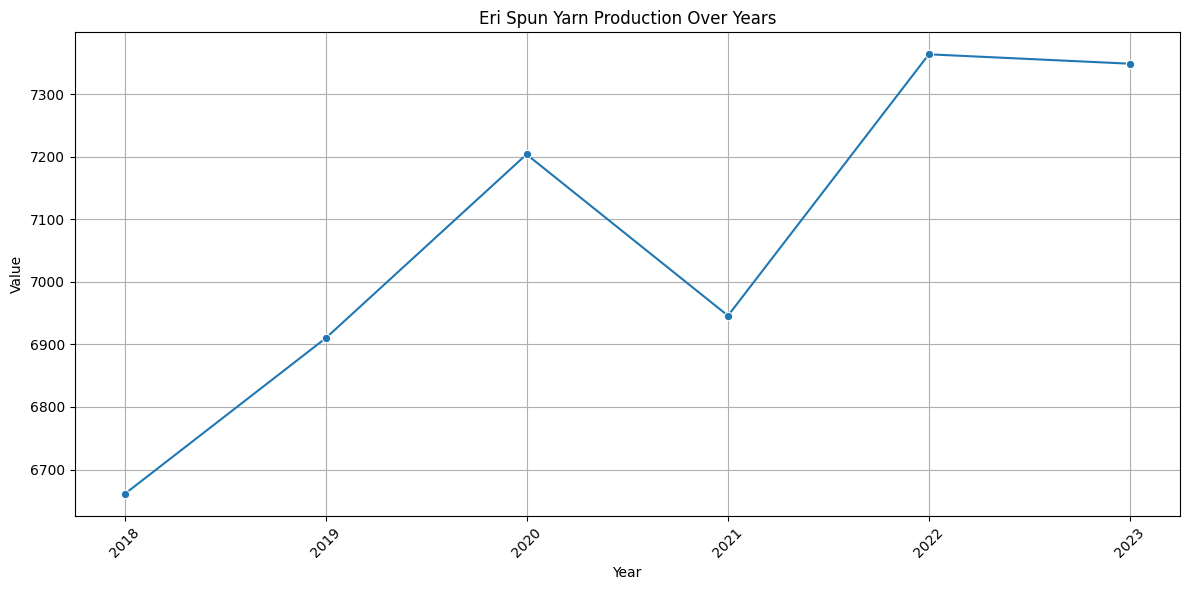

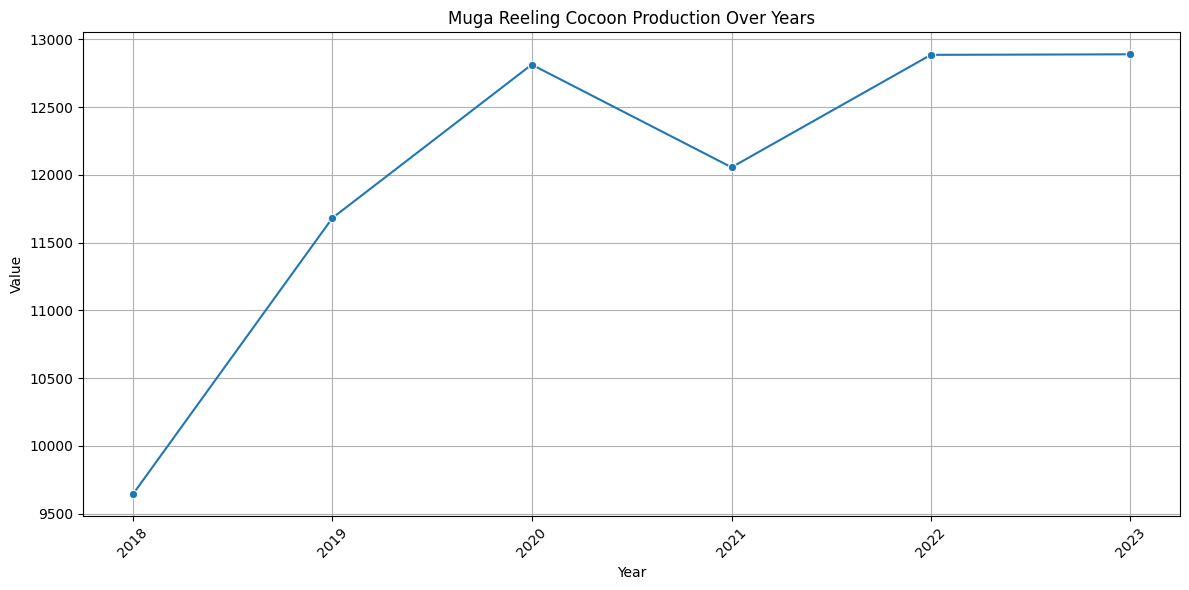

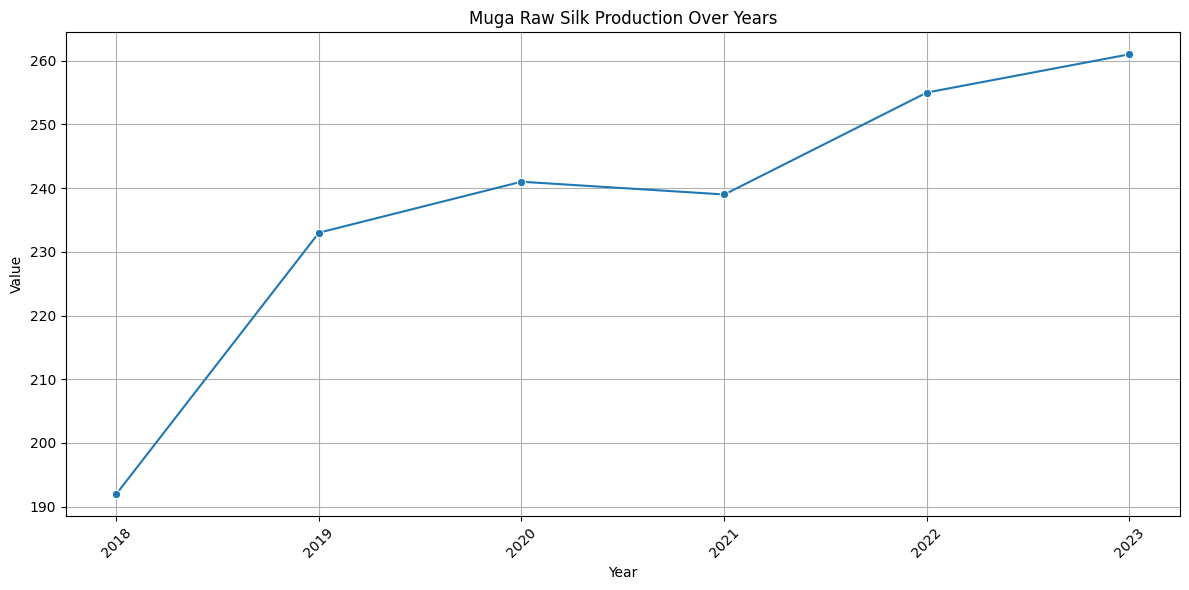

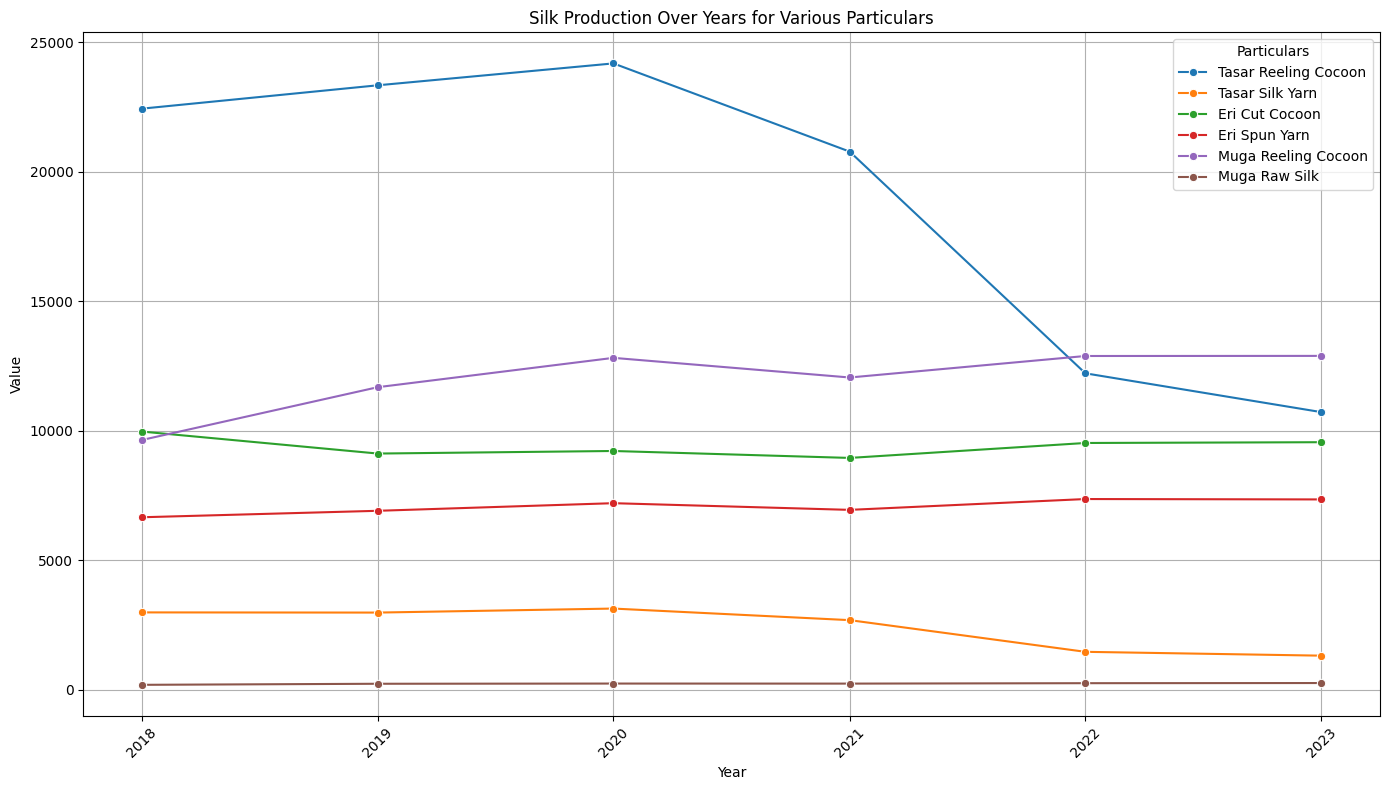

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Convert 'Year' column to datetime format
data_long['Year'] = pd.to_datetime(data_long['Year'].astype(str), format='%Y-%y', errors='coerce')

# Filter rows based on specific particulars
particulars_of_interest = [
    'Tasar Reeling Cocoon',
    'Tasar Silk Yarn',
    'Eri Cut Cocoon',
    'Eri Spun Yarn',
    'Muga Reeling Cocoon',
    'Muga Raw Silk'
]

filtered_data = data_long[data_long['Particulars'].isin(particulars_of_interest)]

# Plot each particular separately
for particular in particulars_of_interest:
    subset = filtered_data[filtered_data['Particulars'] == particular]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=subset, x='Year', y='Value', marker='o')
    plt.title(f'{particular} Production Over Years')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{particular.replace(" ", "_")}_production_over_years.png')
    plt.show()

# Optional: Combine plots into a single plot (multi-line plot)
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Year', y='Value', hue='Particulars', marker='o')
plt.title('Silk Production Over Years for Various Particulars')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Particulars')
plt.grid(True)
plt.tight_layout()
plt.savefig('combined_silk_production_over_years.png')
plt.show()


<Figure size 1400x800 with 0 Axes>

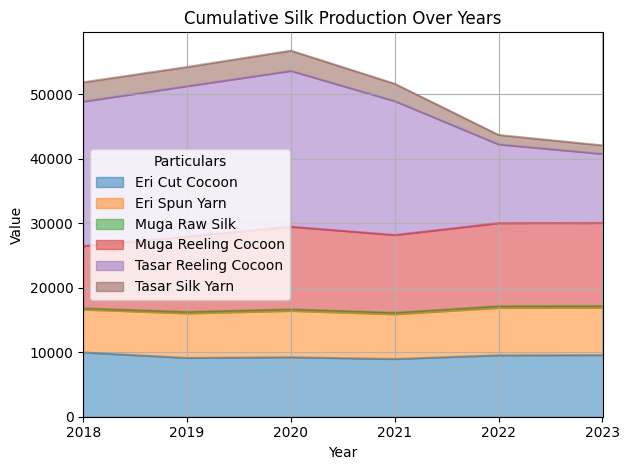

In [100]:
import matplotlib.pyplot as plt

# Pivot data for stacked area chart
pivot_data = filtered_data.pivot_table(index='Year', columns='Particulars', values='Value')

plt.figure(figsize=(14, 8))
pivot_data.plot(kind='area', stacked=True, alpha=0.5)
plt.title('Cumulative Silk Production Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Particulars')
plt.grid(True)
plt.tight_layout()
plt.savefig('stacked_area_chart.png')
plt.show()


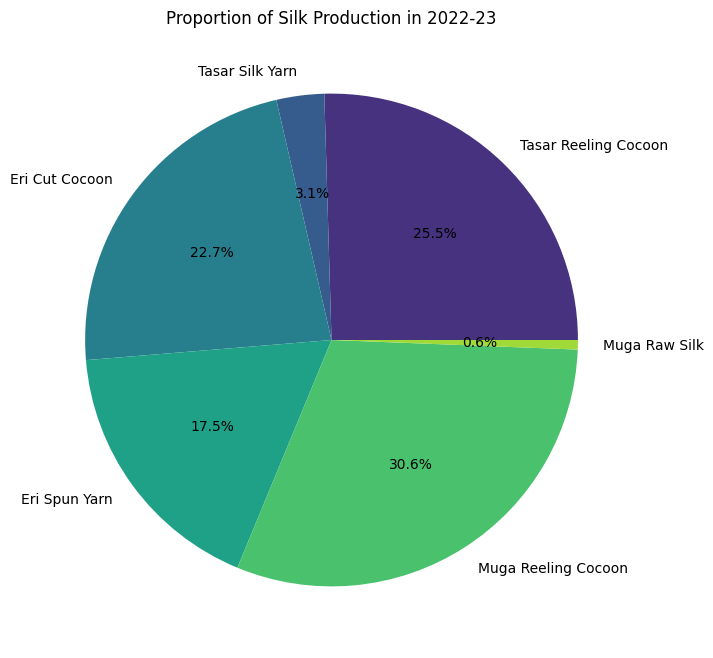

In [101]:
# Pie chart for the most recent year (2022-23)
latest_year = '2022-23'
subset_latest = filtered_data[filtered_data['Year'].dt.year == pd.to_datetime(latest_year, format='%Y-%y').year]

plt.figure(figsize=(8, 8))
plt.pie(subset_latest['Value'], labels=subset_latest['Particulars'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(subset_latest)))
plt.title(f'Proportion of Silk Production in {latest_year}')
plt.savefig('pie_chart_2022_23.png')
plt.show()


C:\Users\nakul\AppData\Local\Temp\ipykernel_6324\2781897217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Year'].dt.strftime('%Y')


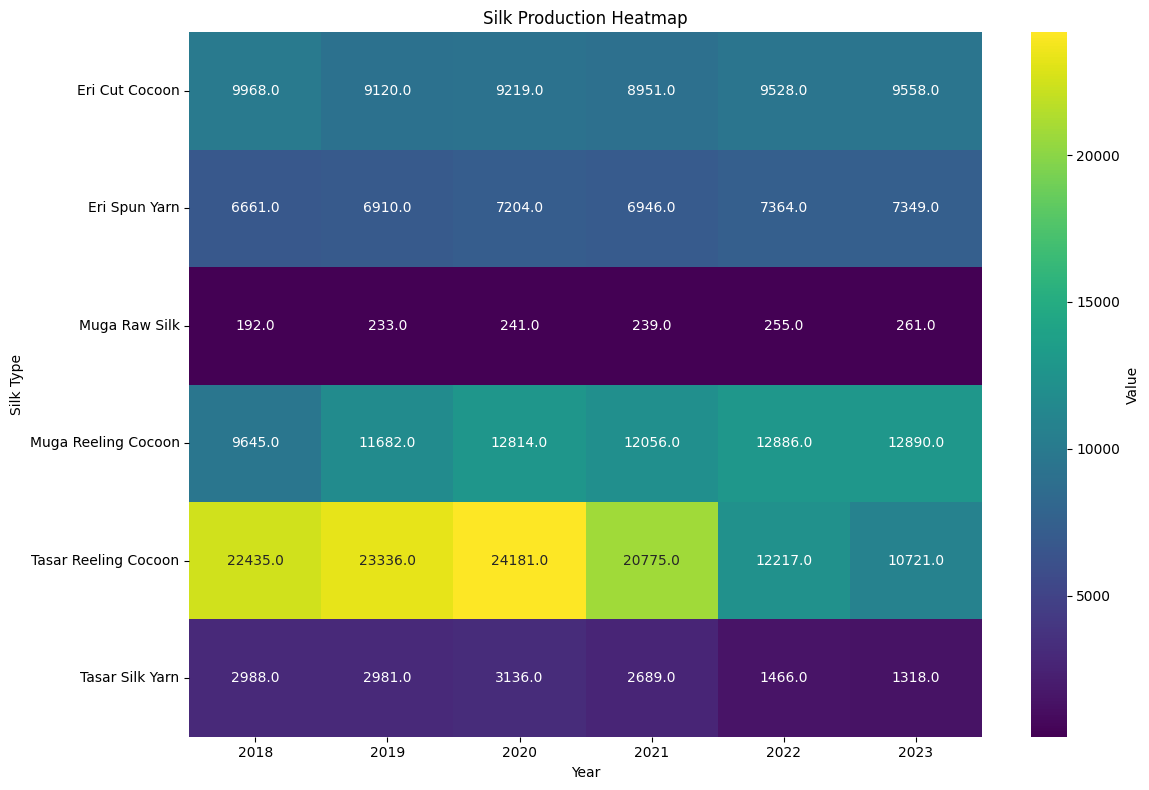

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Year' column is treated as strings for correct formatting
filtered_data['Year'] = filtered_data['Year'].dt.strftime('%Y')

# Pivot data for heatmap with silk names on y-axis and years on x-axis
heatmap_data = filtered_data.pivot(index='Particulars', columns='Year', values='Value')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.1f', cbar_kws={'label': 'Value'})
plt.title('Silk Production Heatmap')
plt.xlabel('Year')
plt.ylabel('Silk Type')
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()


C:\Users\nakul\AppData\Local\Temp\ipykernel_6324\3713238794.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Particulars', y='Value', hue='Year', ci=None)


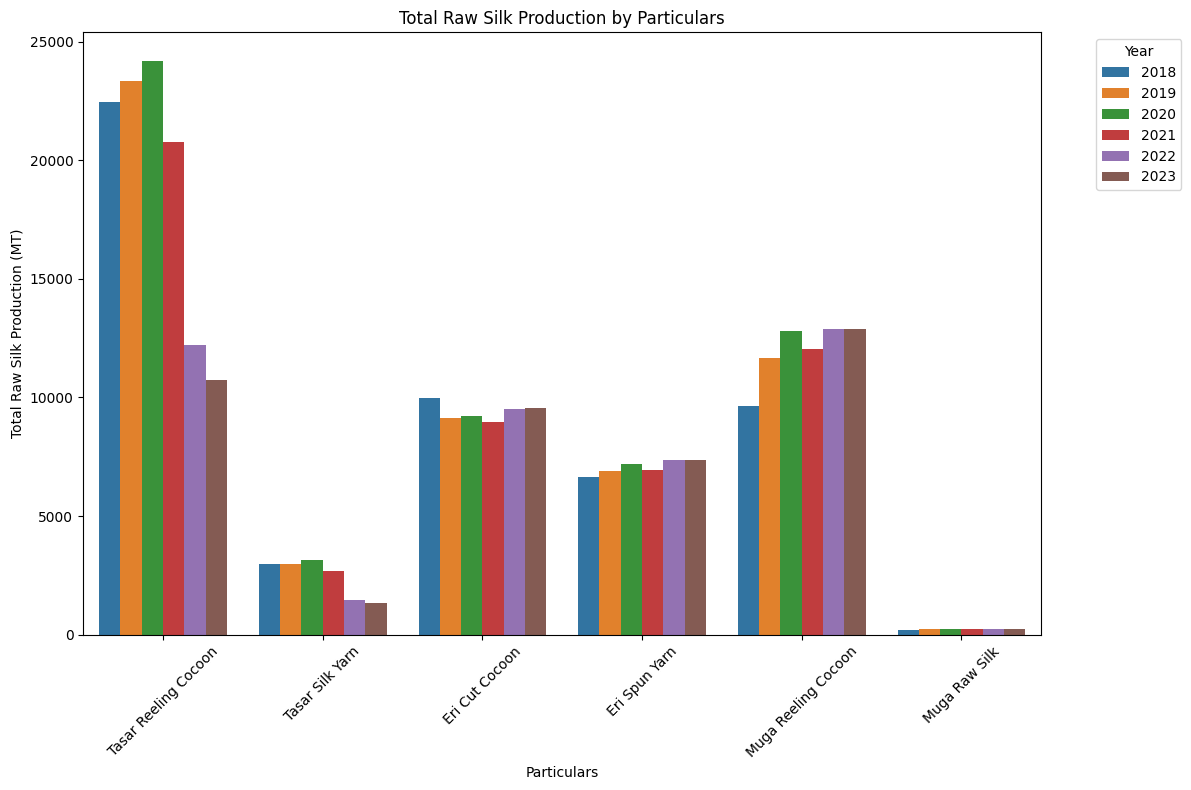

In [103]:
# Bar plot for total production across all years
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='Particulars', y='Value', hue='Year', ci=None)
plt.title('Total Raw Silk Production by Particulars')
plt.xlabel('Particulars')
plt.ylabel('Total Raw Silk Production (MT)')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


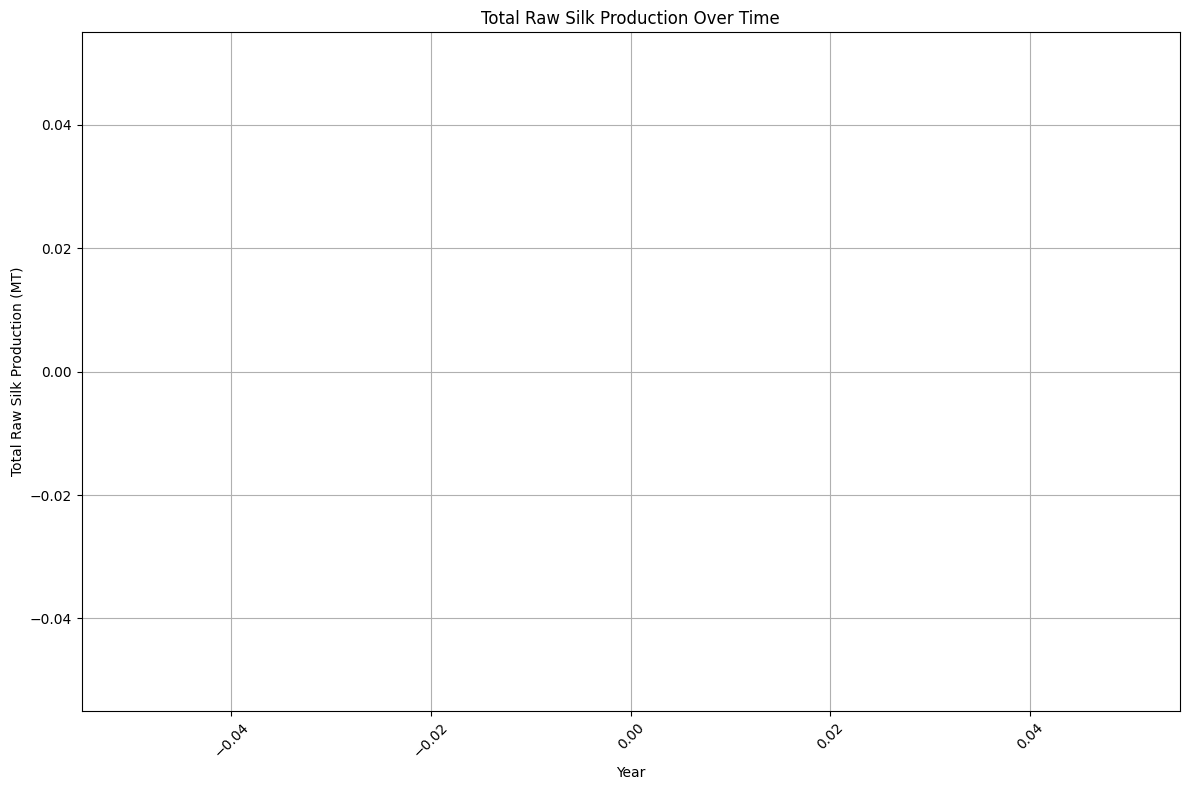

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specific row
total_raw_silk_data = filtered_data[filtered_data['Particulars'] == 'Total Raw Silk Production']

# Line plot for Total Raw Silk Production
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_raw_silk_data, x='Year', y='Value', marker='o')
plt.title('Total Raw Silk Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Raw Silk Production (MT)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


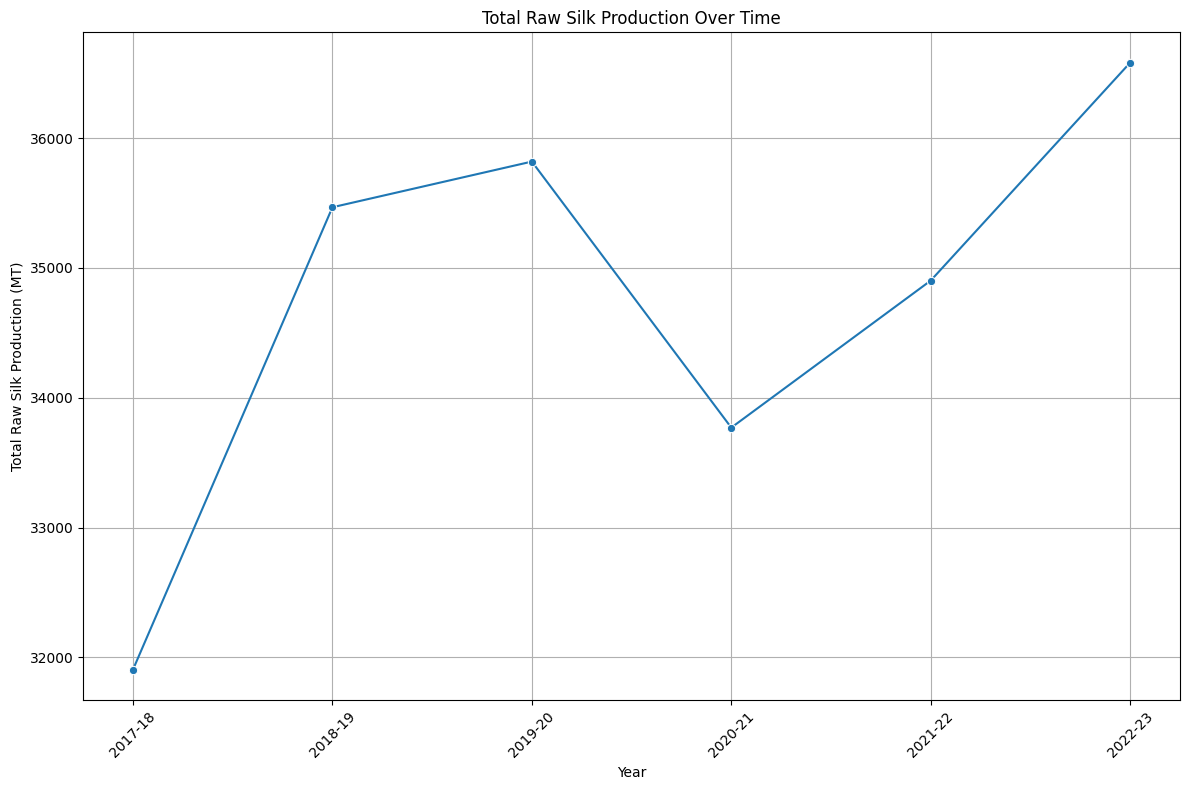

In [107]:
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Filter data for 'Total Raw Silk Production'
total_raw_silk_data = data_long[data_long['Particulars'] == 'Total Raw Silk Production']

plt.figure(figsize=(12, 8))
sns.lineplot(data=total_raw_silk_data, x='Year', y='Value', marker='o')
plt.title('Total Raw Silk Production Over Time')
plt.xlabel('Year')
plt.ylabel('Total Raw Silk Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


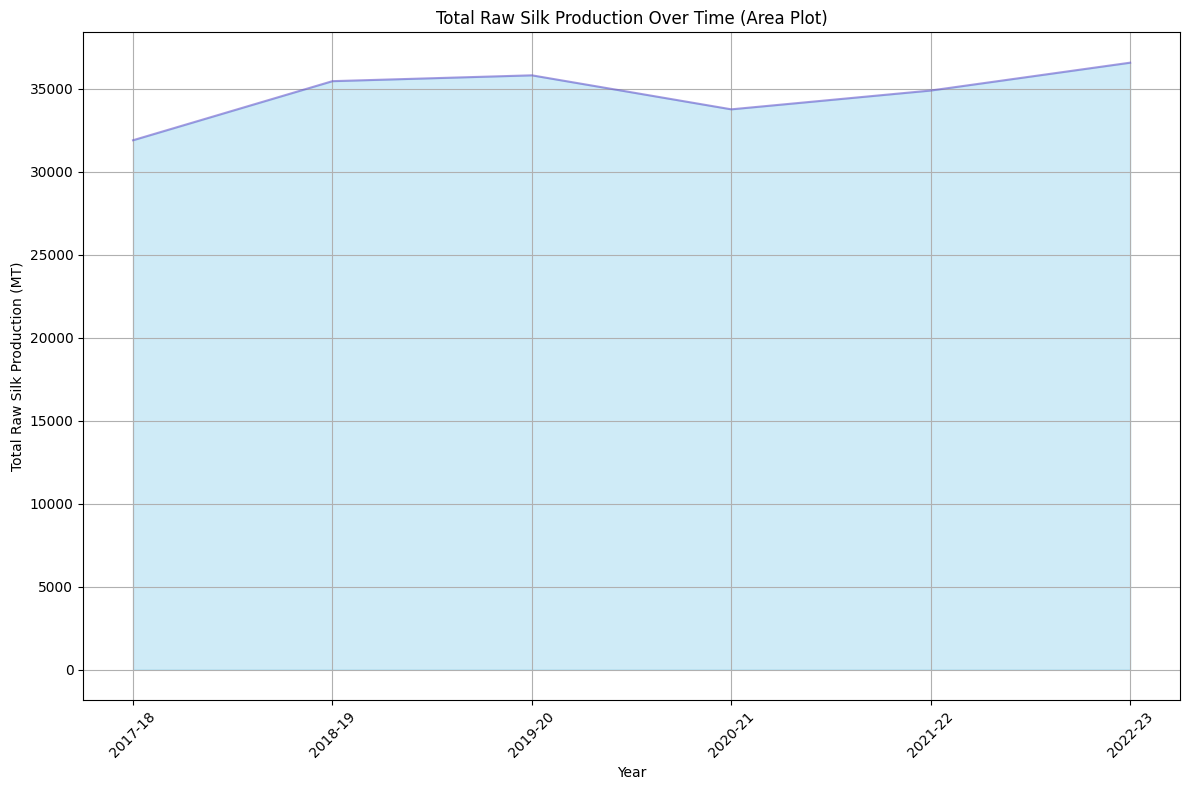

In [108]:
plt.figure(figsize=(12, 8))
plt.fill_between(total_raw_silk_data['Year'].astype(str), total_raw_silk_data['Value'], color="skyblue", alpha=0.4)
plt.plot(total_raw_silk_data['Year'].astype(str), total_raw_silk_data['Value'], color="Slateblue", alpha=0.6)
plt.title('Total Raw Silk Production Over Time (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Total Raw Silk Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


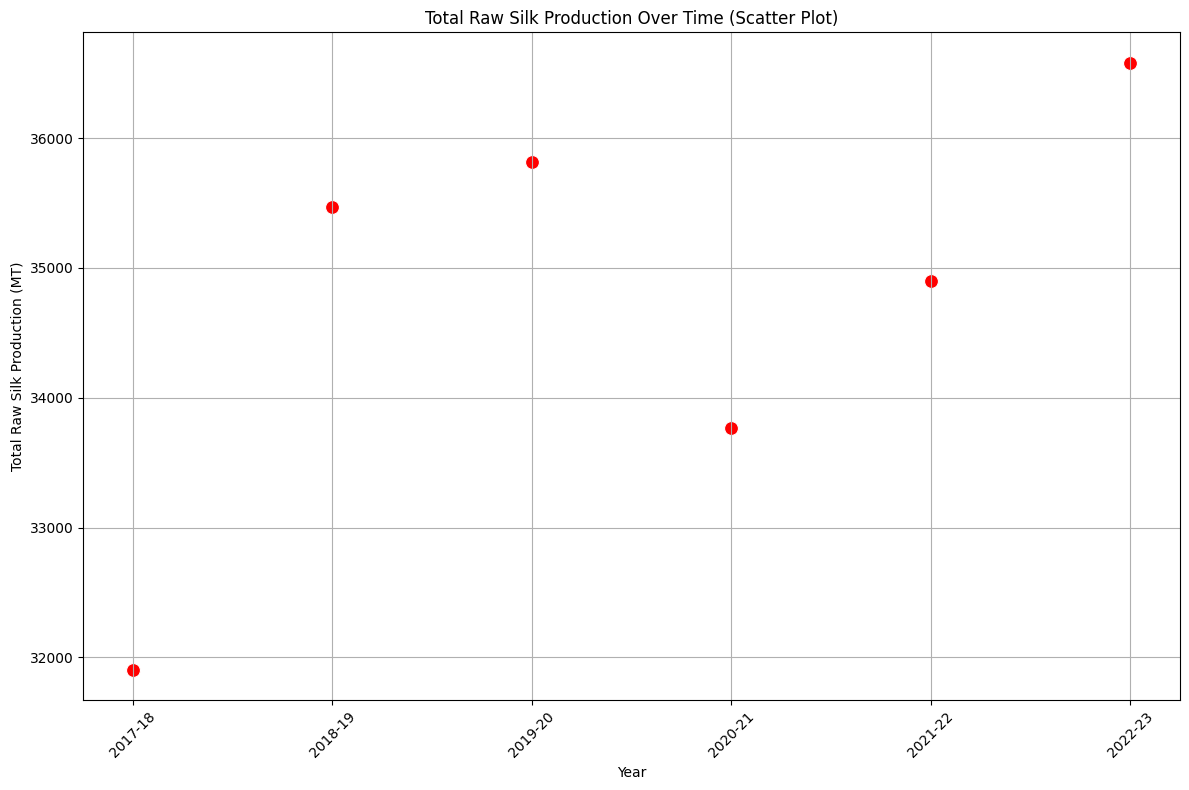

In [109]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=total_raw_silk_data, x='Year', y='Value', color='red', s=100, marker='o')
plt.title('Total Raw Silk Production Over Time (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Total Raw Silk Production (MT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [112]:
# Filter data for Exports in Crore Rs.
exports_crore_df = data[(data['Particulars'] == 'Exports') & (data['Unit'] == 'Crore Rs.')]

# Filter data for Exports in Mn. US$
exports_usd_df = data[(data['Particulars'] == 'Exports') & (data['Unit'] == 'Mn. US$')]



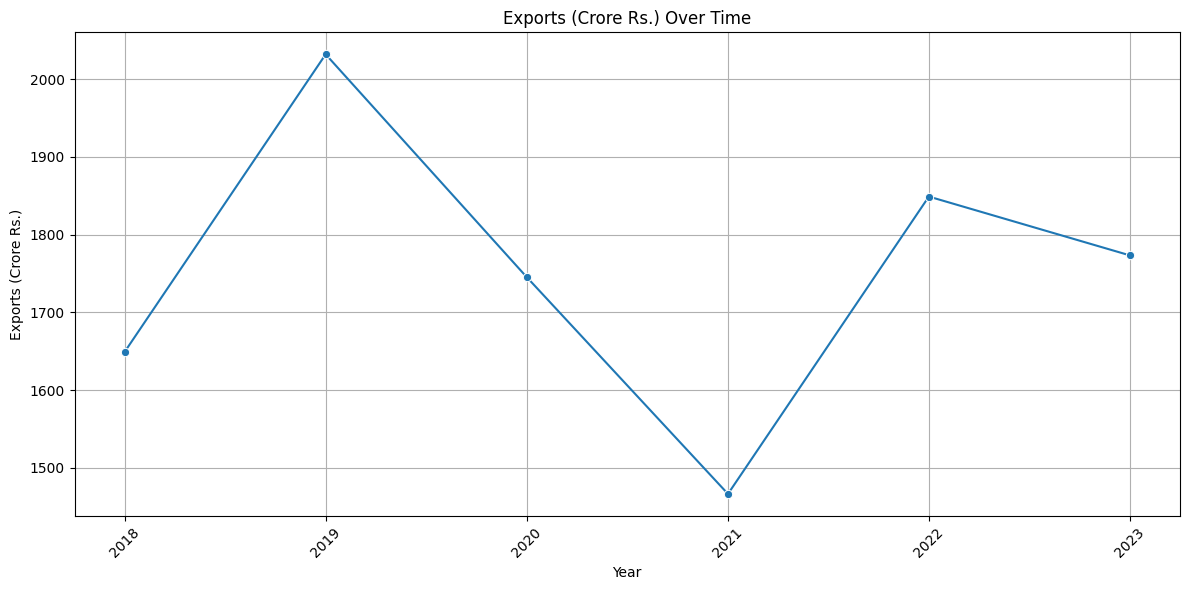

In [113]:

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric if needed
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Filter data for Exports in Crore Rs.
exports_crore_df = data[(data['Particulars'] == 'Exports') & (data['Unit'] == 'Crore Rs.')]

# Reshape data into long format
exports_crore_long = exports_crore_df.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                                           var_name='Year', value_name='Value')

# Convert 'Year' column to datetime format
exports_crore_long['Year'] = pd.to_datetime(exports_crore_long['Year'].astype(str), format='%Y-%y', errors='coerce')

# Plot Exports in Crore Rs.
plt.figure(figsize=(12, 6))
sns.lineplot(data=exports_crore_long, x='Year', y='Value', marker='o')
plt.title('Exports (Crore Rs.) Over Time')
plt.xlabel('Year')
plt.ylabel('Exports (Crore Rs.)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


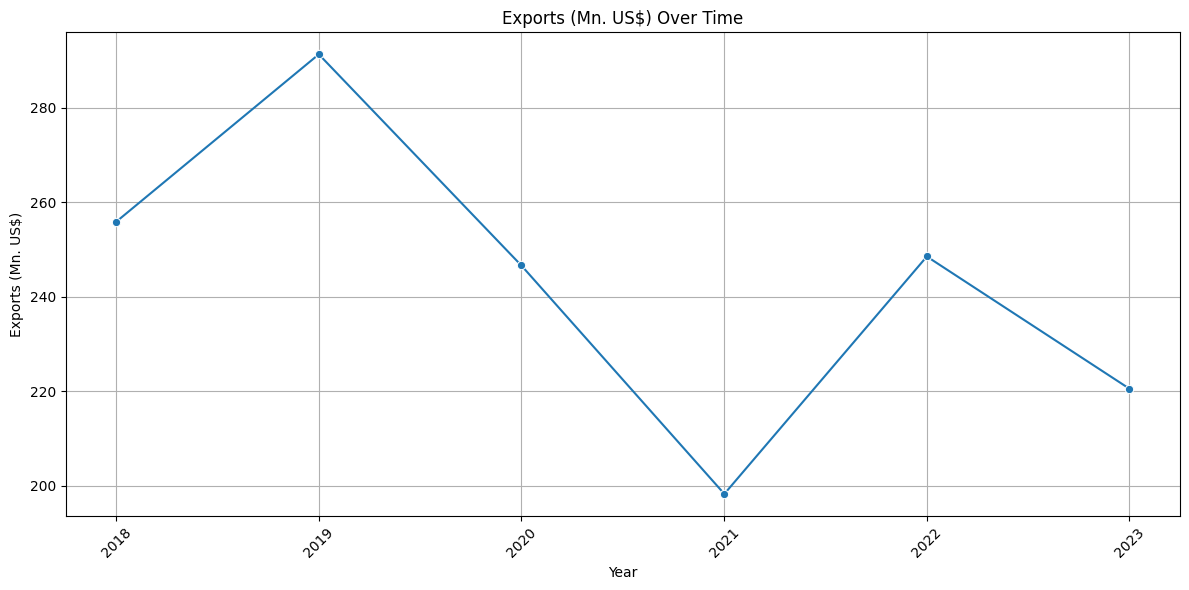

In [114]:
# Filter data for Exports in Mn. US$
exports_usd_df = data[(data['Particulars'] == 'Exports') & (data['Unit'] == 'Mn. US$')]

# Reshape data into long format
exports_usd_long = exports_usd_df.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                                       var_name='Year', value_name='Value')

# Convert 'Year' column to datetime format
exports_usd_long['Year'] = pd.to_datetime(exports_usd_long['Year'].astype(str), format='%Y-%y', errors='coerce')

# Plot Exports in Mn. US$
plt.figure(figsize=(12, 6))
sns.lineplot(data=exports_usd_long, x='Year', y='Value', marker='o')
plt.title('Exports (Mn. US$) Over Time')
plt.xlabel('Year')
plt.ylabel('Exports (Mn. US$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


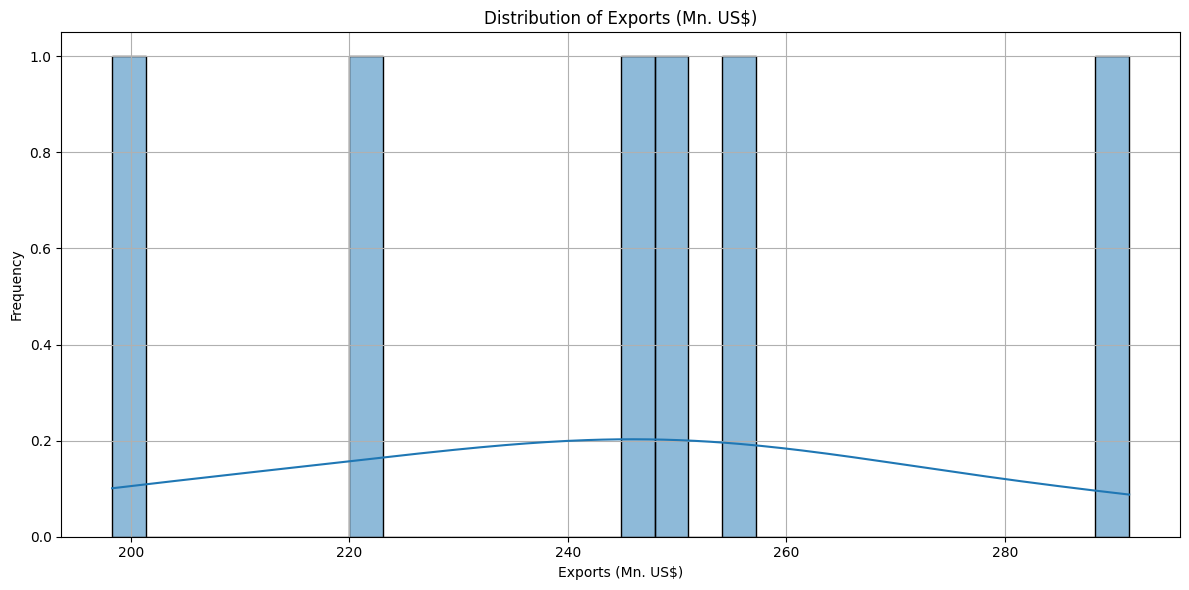

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(exports_usd_long['Value'].dropna(), bins=30, kde=True)
plt.title('Distribution of Exports (Mn. US$)')
plt.xlabel('Exports (Mn. US$)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


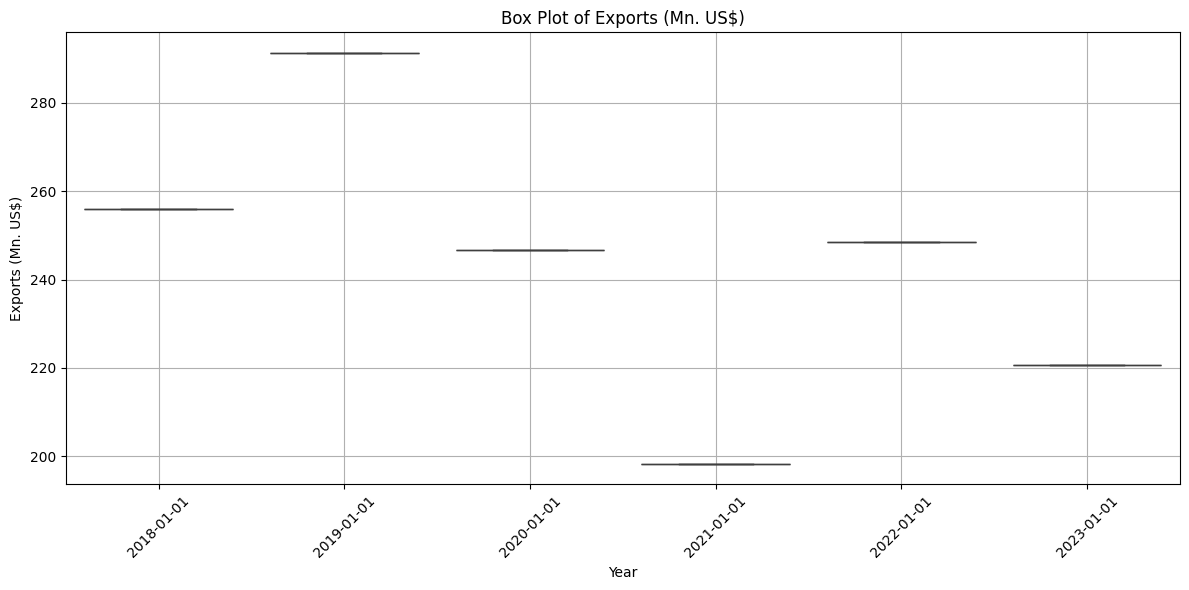

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=exports_usd_long, x='Year', y='Value')
plt.title('Box Plot of Exports (Mn. US$)')
plt.xlabel('Year')
plt.ylabel('Exports (Mn. US$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


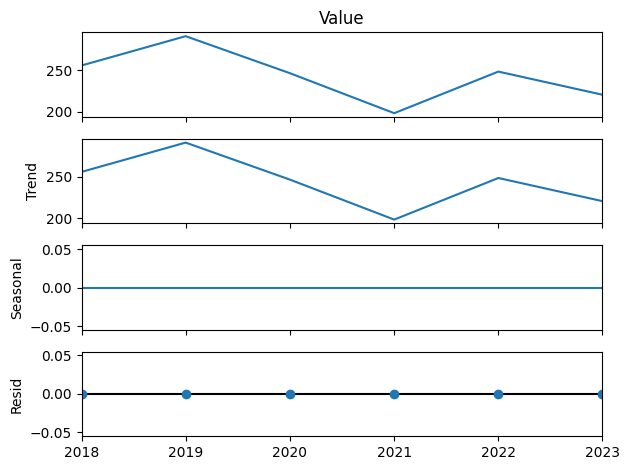

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Year' as the index and sort by it
exports_usd_long.set_index('Year', inplace=True)
exports_usd_long.sort_index(inplace=True)

# Decompose the time series
result = seasonal_decompose(exports_usd_long['Value'].dropna(), model='additive')
result.plot()
plt.show()


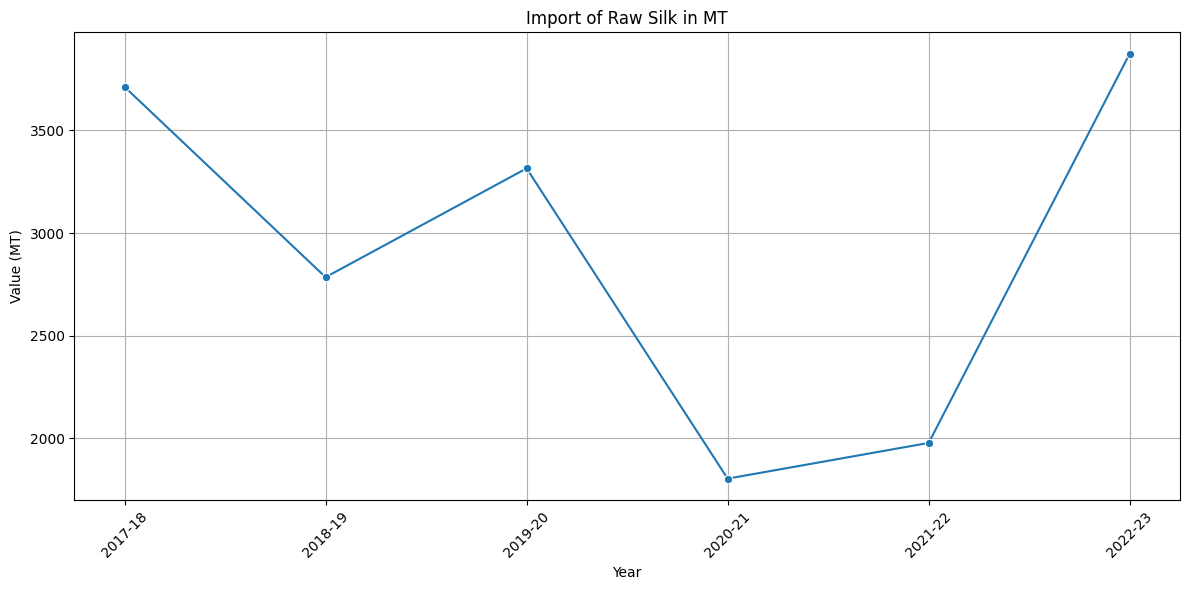

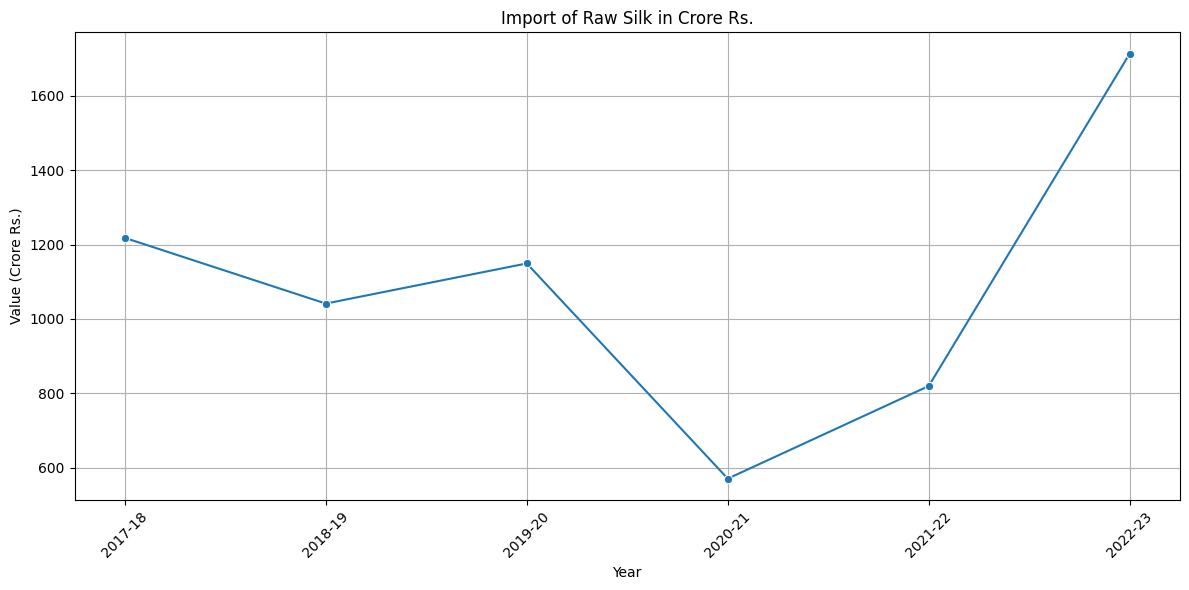

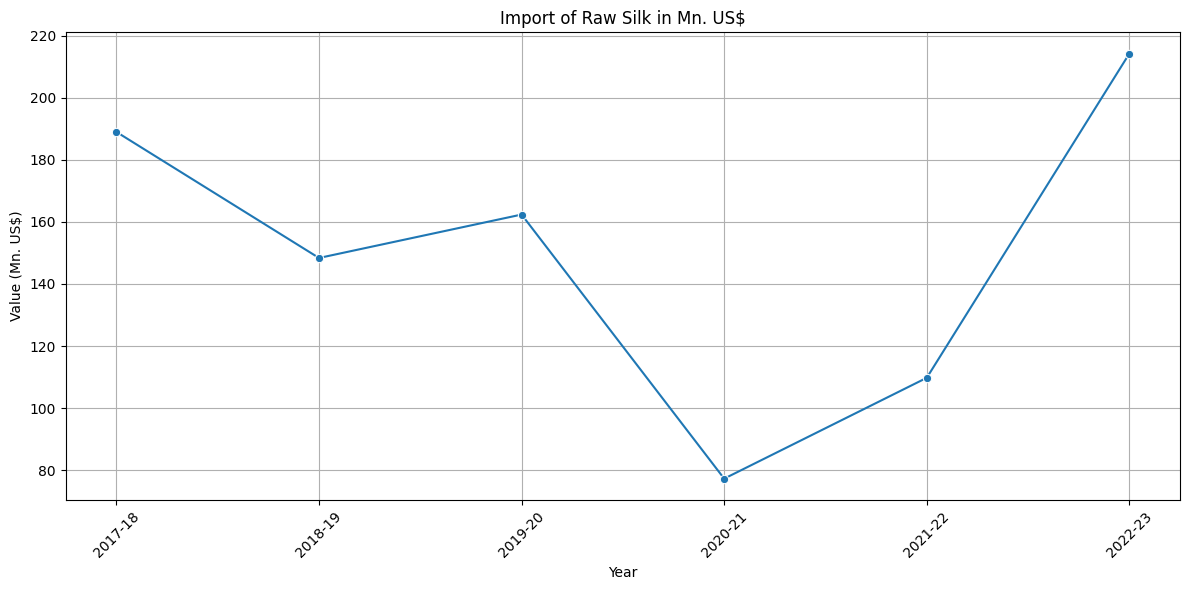

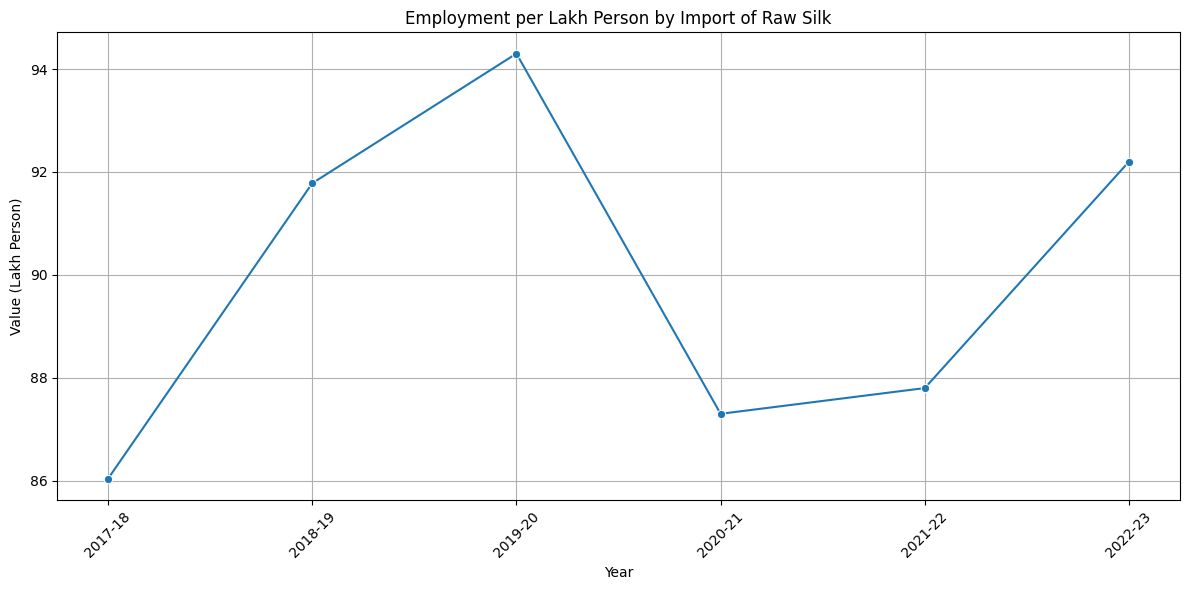

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Define SL Nos and their corresponding titles
sl_no_titles = {
    18: 'Import of Raw Silk in MT',
    19: 'Import of Raw Silk in Crore Rs.',
    20: 'Import of Raw Silk in Mn. US$',
    21: 'Employment per Lakh Person by Import of Raw Silk'
}

# Plot data for each SL No
for sl_no, title in sl_no_titles.items():
    # Filter data based on SL No
    row_data = data_long[data_long['Sl. No.'] == sl_no]
    
    if row_data.empty:
        print(f"No data available for Sl. No. {sl_no}.")
        continue

    # Plot data
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=row_data, x='Year', y='Value', marker='o')
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(f'Value ({row_data["Unit"].iloc[0]})')
    
    # Formatting
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


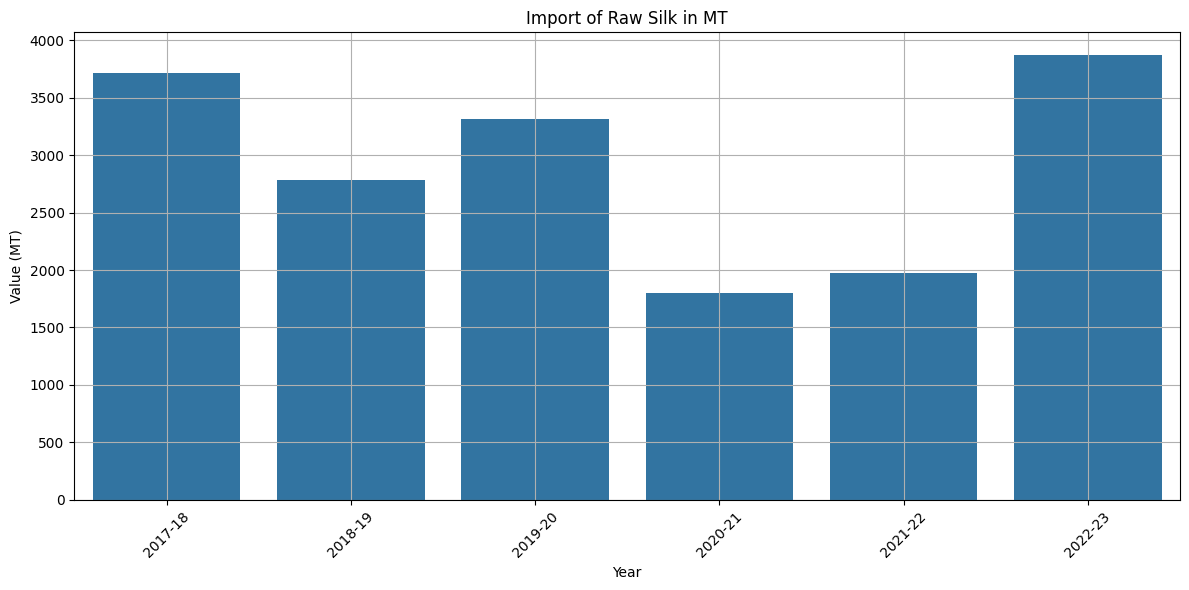

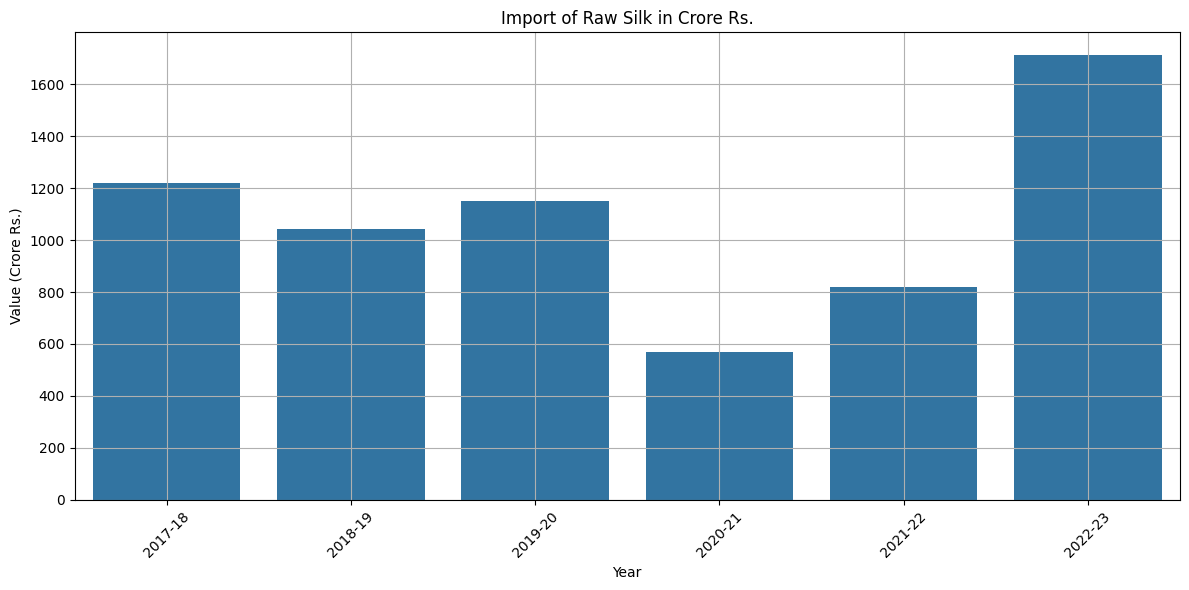

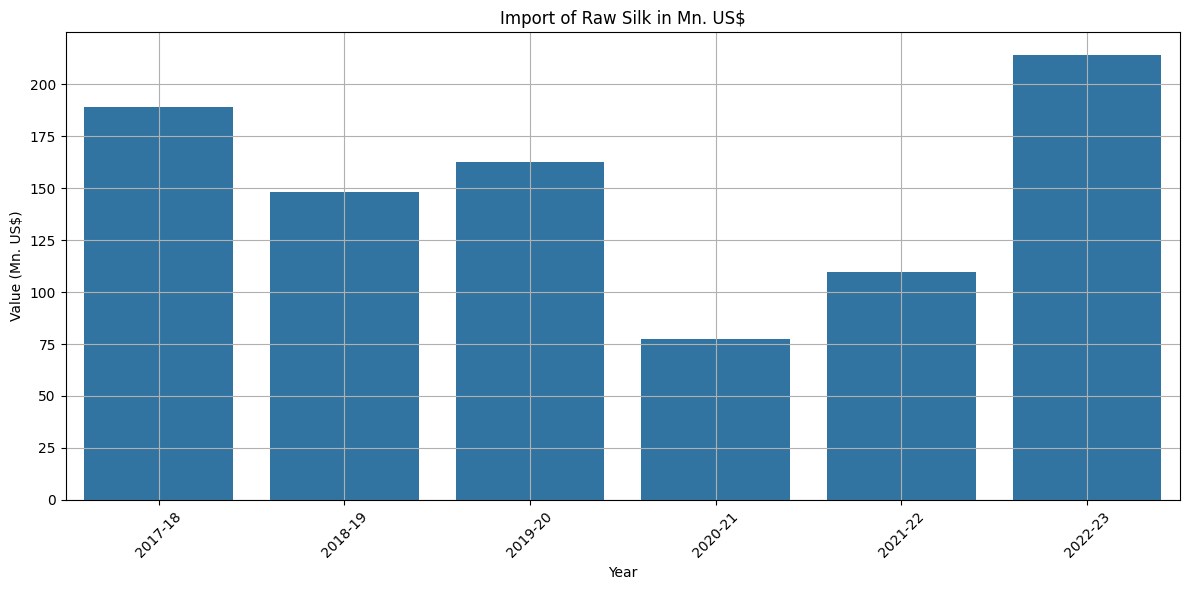

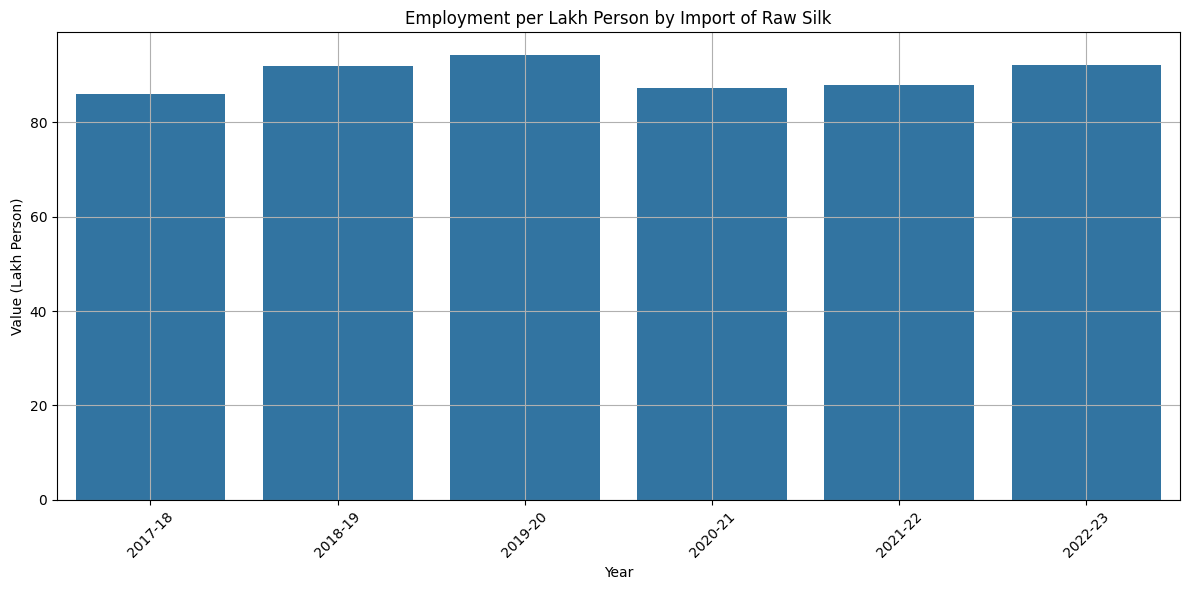

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Define SL Nos and their corresponding titles
sl_no_titles = {
    18: 'Import of Raw Silk in MT',
    19: 'Import of Raw Silk in Crore Rs.',
    20: 'Import of Raw Silk in Mn. US$',
    21: 'Employment per Lakh Person by Import of Raw Silk'
}

# Plot data as Bar Chart
for sl_no, title in sl_no_titles.items():
    # Filter data based on SL No
    row_data = data_long[data_long['Sl. No.'] == sl_no]
    
    if row_data.empty:
        print(f"No data available for Sl. No. {sl_no}.")
        continue

    # Plot data
    plt.figure(figsize=(12, 6))
    sns.barplot(data=row_data, x='Year', y='Value', errorbar=None)  # Use errorbar=None instead of ci=None
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(f'Value ({row_data["Unit"].iloc[0]})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


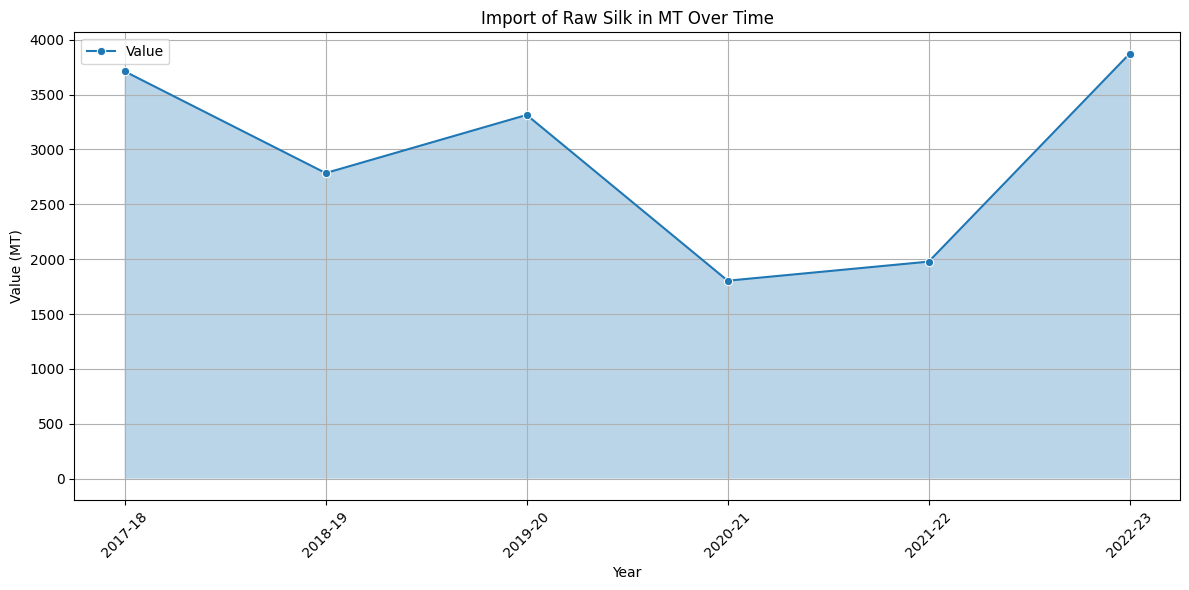

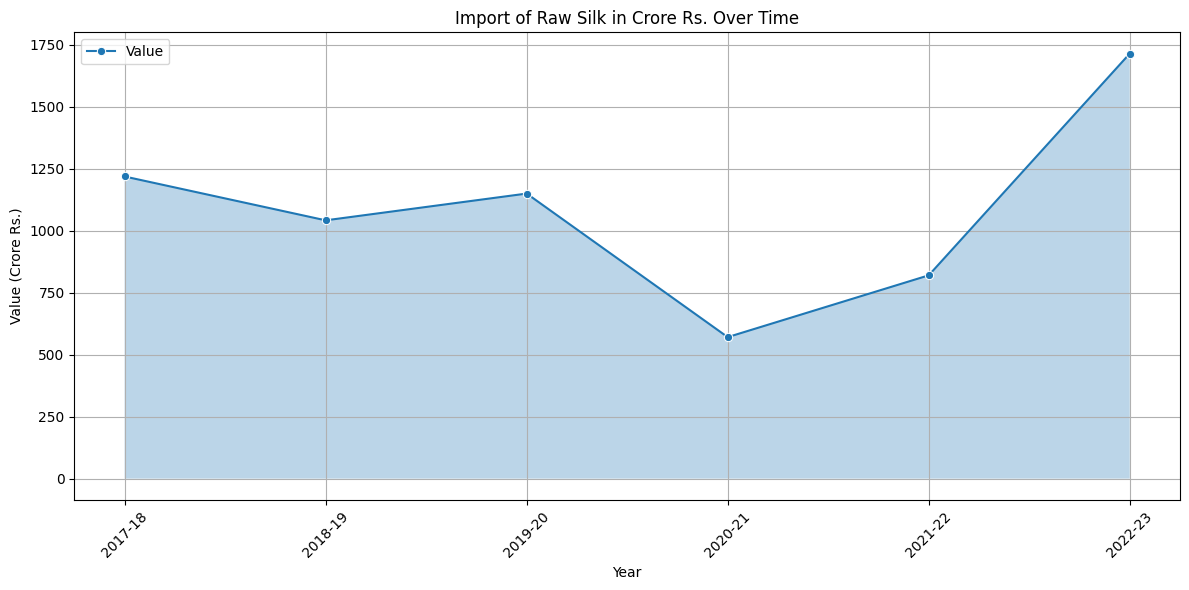

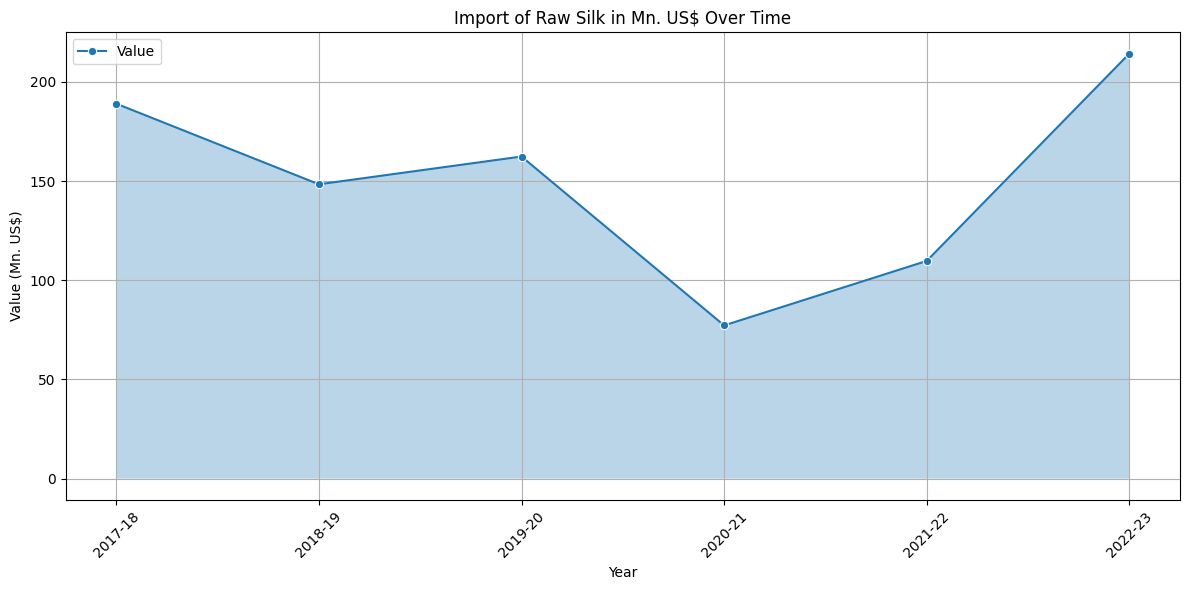

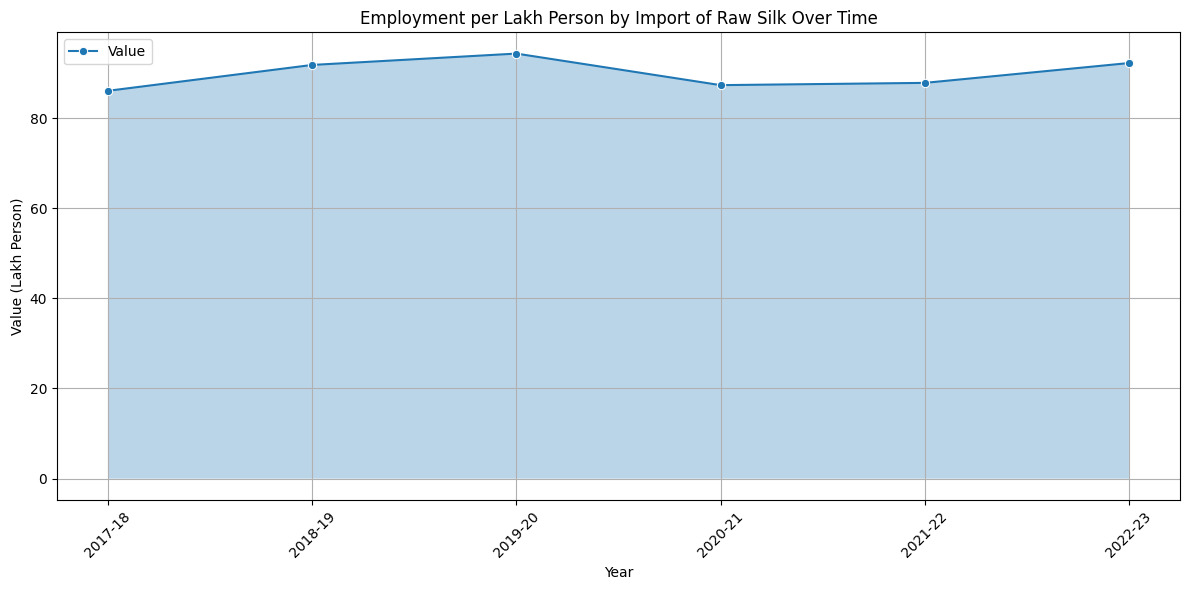

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Define SL Nos and their corresponding titles
sl_no_titles = {
    18: 'Import of Raw Silk in MT',
    19: 'Import of Raw Silk in Crore Rs.',
    20: 'Import of Raw Silk in Mn. US$',
    21: 'Employment per Lakh Person by Import of Raw Silk'
}

# Plot data as Area Chart
for sl_no, title in sl_no_titles.items():
    # Filter data based on SL No
    row_data = data_long[data_long['Sl. No.'] == sl_no]
    
    if row_data.empty:
        print(f"No data available for Sl. No. {sl_no}.")
        continue

    # Plot data
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=row_data, x='Year', y='Value', marker='o', label='Value')
    plt.fill_between(row_data['Year'], row_data['Value'], alpha=0.3)
    plt.title(f'{title} Over Time')
    plt.xlabel('Year')
    plt.ylabel(f'Value ({row_data["Unit"].iloc[0]})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


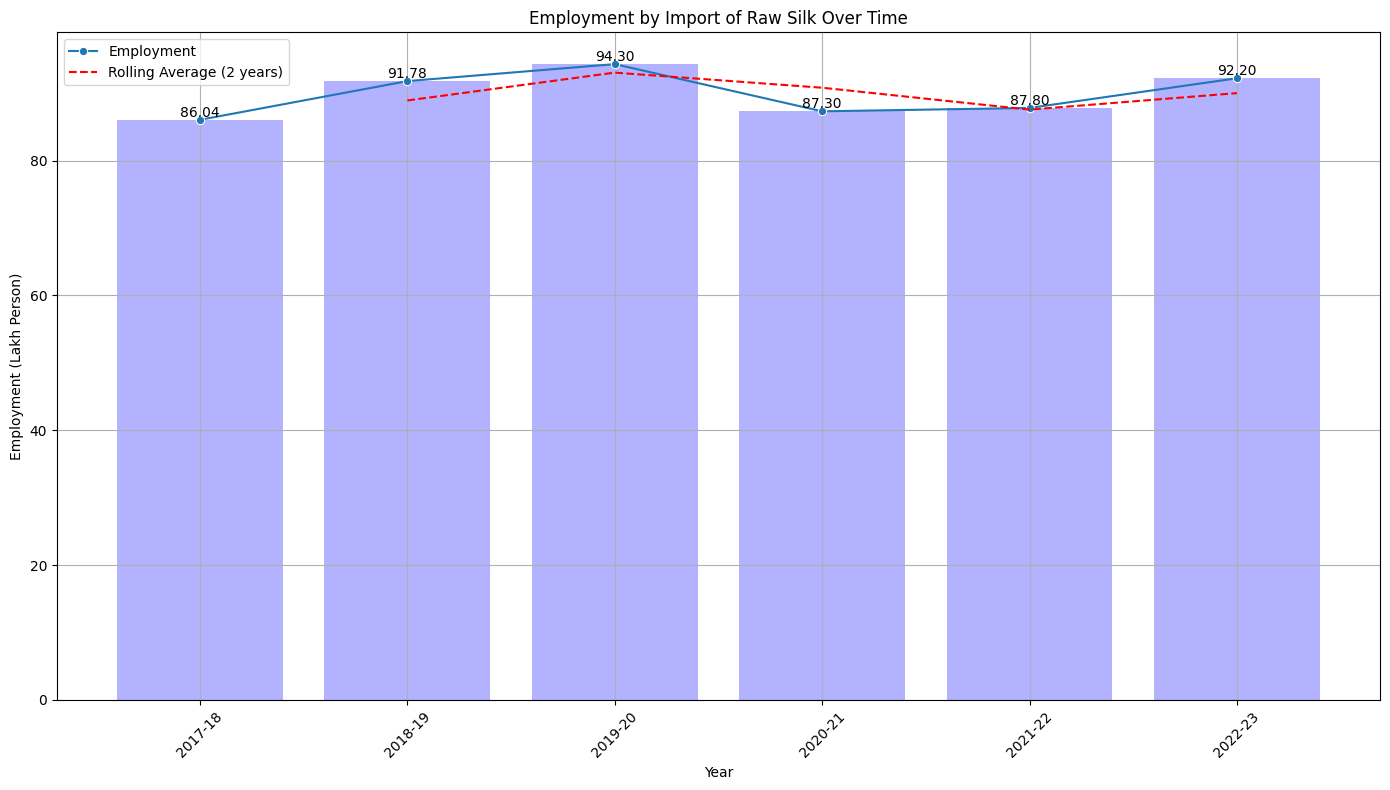

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Filter data for Employment
employment_data = data_long[(data_long['Sl. No.'] == 21) & (data_long['Particulars'] == 'Employment')]

if employment_data.empty:
    print("No data available for Employment.")
else:
    # Calculate rolling average
    employment_data = employment_data.copy()  # Make a copy to avoid SettingWithCopyWarning
    employment_data['Rolling_Avg'] = employment_data['Value'].rolling(window=2).mean()
    
    # Plotting
    plt.figure(figsize=(14, 8))
    
    # Line plot with rolling average
    sns.lineplot(data=employment_data, x='Year', y='Value', marker='o', label='Employment')
    
    # Plot rolling average
    plt.plot(employment_data['Year'], employment_data['Rolling_Avg'], linestyle='--', color='red', label='Rolling Average (2 years)')
    
    # Bar plot for the raw data
    plt.bar(employment_data['Year'], employment_data['Value'], alpha=0.3, color='blue')
    
    # Highlight specific years with annotations
    for index, row in employment_data.iterrows():
        plt.text(row['Year'], row['Value'], f'{row["Value"]:.2f}', ha='center', va='bottom')
    
    # Set titles and labels
    plt.title('Employment by Import of Raw Silk Over Time')
    plt.xlabel('Year')
    plt.ylabel('Employment (Lakh Person)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


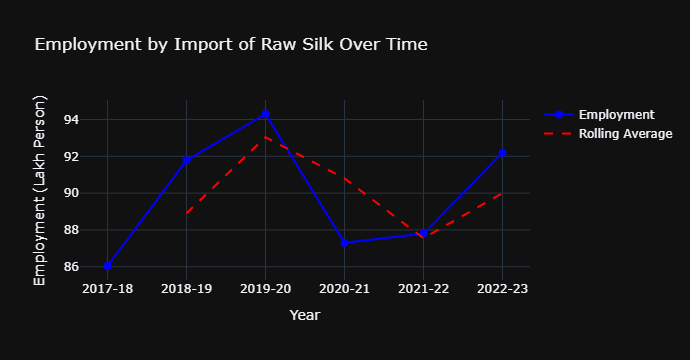

In [150]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Filter data for Employment
employment_data = data_long[(data_long['Sl. No.'] == 21) & (data_long['Particulars'] == 'Employment')].copy()

if employment_data.empty:
    print("No data available for Employment.")
else:
    # Create the interactive plot
    fig = go.Figure()

    # Add trace for Employment data
    fig.add_trace(go.Scatter(x=employment_data['Year'], y=employment_data['Value'],
                             mode='lines+markers',
                             name='Employment',
                             line=dict(color='blue', width=2),
                             marker=dict(size=8, color='blue')))

    # Add rolling average
    employment_data['Rolling_Avg'] = employment_data['Value'].rolling(window=2).mean()
    fig.add_trace(go.Scatter(x=employment_data['Year'], y=employment_data['Rolling_Avg'],
                             mode='lines',
                             name='Rolling Average',
                             line=dict(color='red', width=2, dash='dash')))

    # Update layout
    fig.update_layout(title='Employment by Import of Raw Silk Over Time',
                      xaxis_title='Year',
                      yaxis_title='Employment (Lakh Person)',
                      template='plotly_dark')

    fig.show()


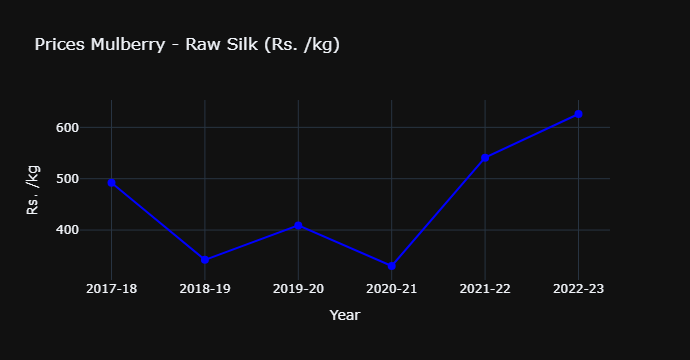

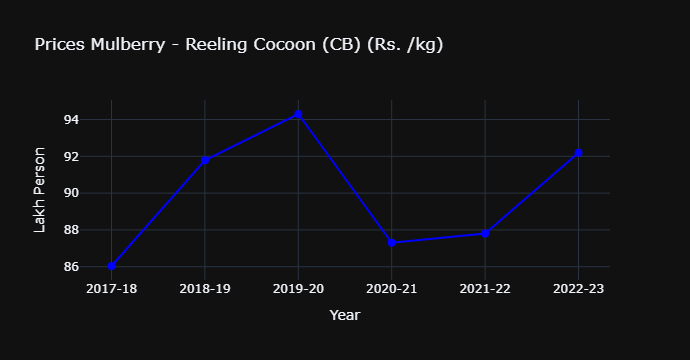

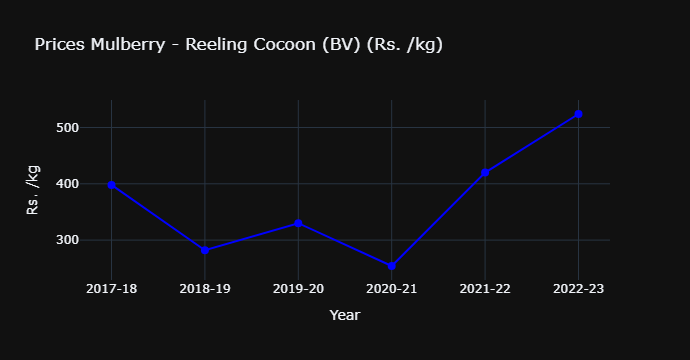

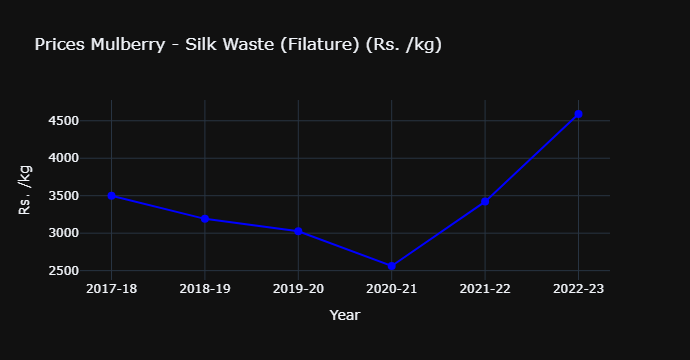

In [153]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Convert year columns to numeric
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']
for col in year_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reshape data into long format
data_long = data.melt(id_vars=['Sl. No.', 'Category', 'Particulars', 'Unit'],
                      var_name='Year', value_name='Value')

# Define a dictionary for the four specific categories and their corresponding titles
category_titles = {
    23: 'Prices Mulberry - Raw Silk (Rs. /kg)',
    21: 'Prices Mulberry - Reeling Cocoon (CB) (Rs. /kg)',
    22: 'Prices Mulberry - Reeling Cocoon (BV) (Rs. /kg)',
    24: 'Prices Mulberry - Silk Waste (Filature) (Rs. /kg)'
}

# Loop through each category and plot the data
for sl_no, title in category_titles.items():
    # Filter data for the selected SL No
    category_data = data_long[data_long['Sl. No.'] == sl_no].copy()

    if category_data.empty:
        print(f"No data available for SL No. {sl_no}.")
        continue

    # Create the interactive plot
    fig = go.Figure()

    # Add trace for the selected category
    fig.add_trace(go.Scatter(x=category_data['Year'], y=category_data['Value'],
                             mode='lines+markers',
                             name=title,
                             line=dict(color='blue', width=2),
                             marker=dict(size=8, color='blue')))

    # Update layout
    fig.update_layout(title=title,
                      xaxis_title='Year',
                      yaxis_title=f'{category_data["Unit"].iloc[0]}',
                      template='plotly_dark')

    fig.show()


No data available for SL No. 25.
No data available for SL No. 26.
No data available for SL No. 27.
No data available for SL No. 28.
No data available for SL No. 29.
No data available for SL No. 30.
No data available for SL No. 31.
No data available for SL No. 32.
No data available for SL No. 33.
No data available for SL No. 34.


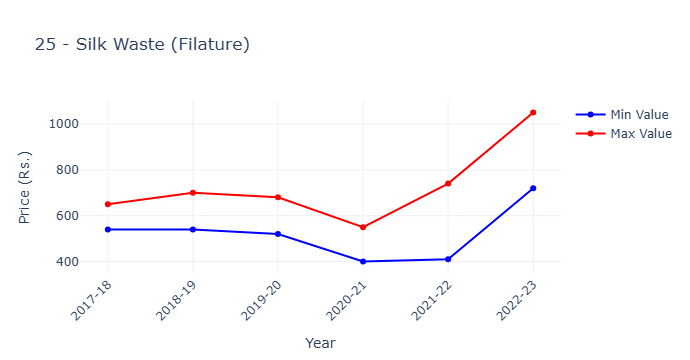

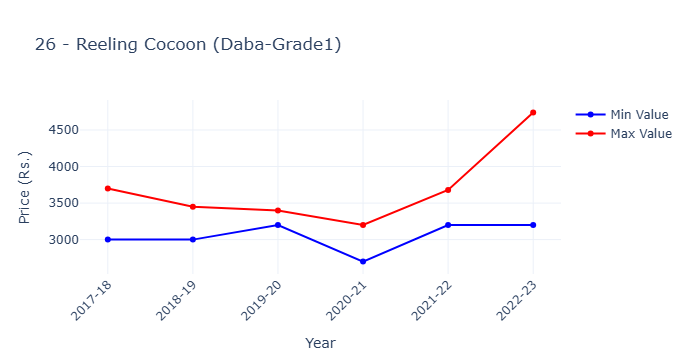

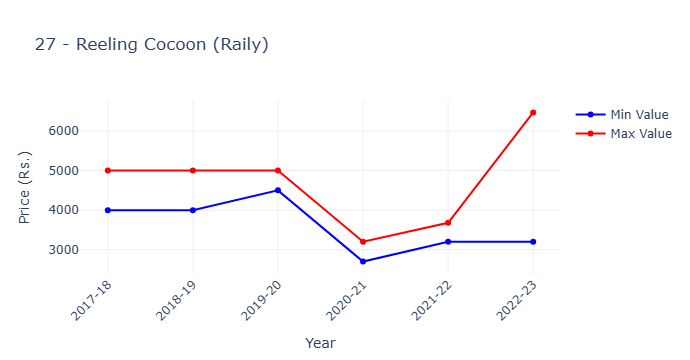

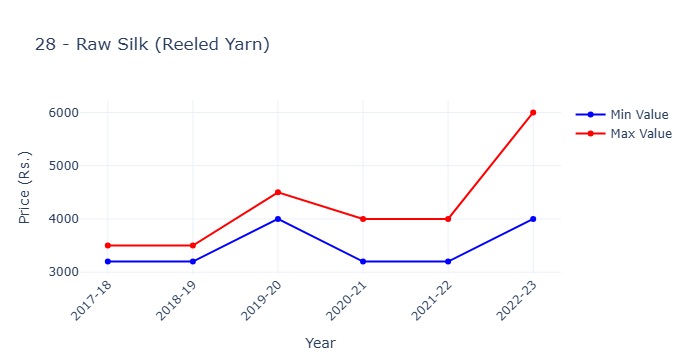

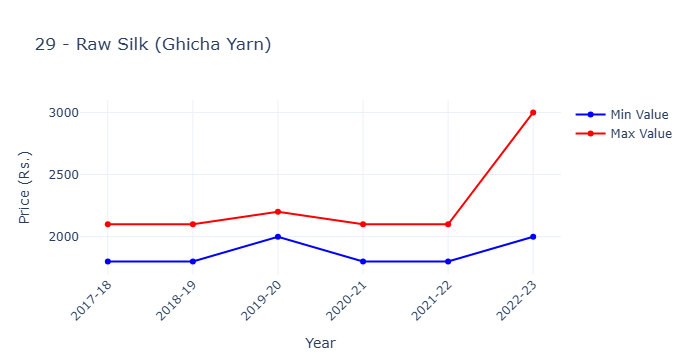

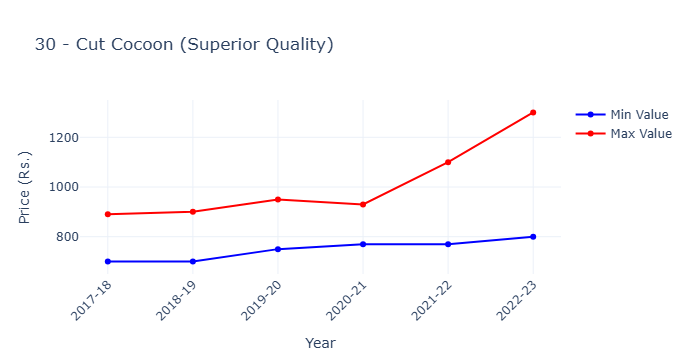

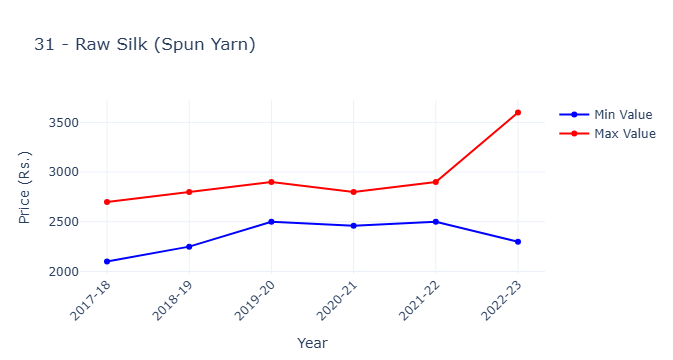

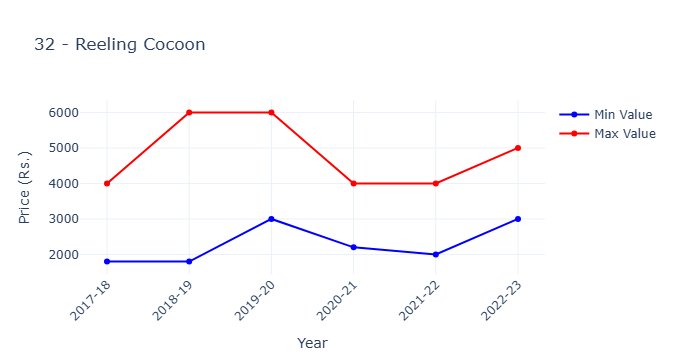

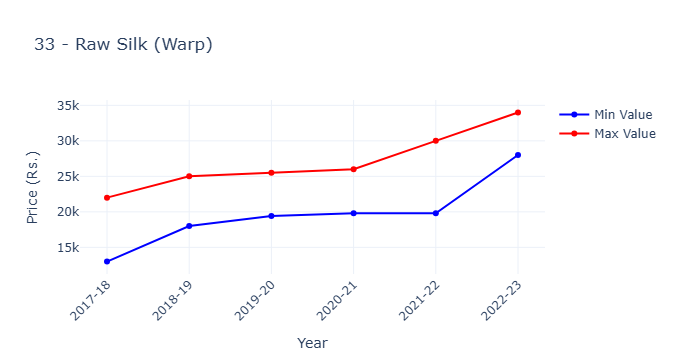

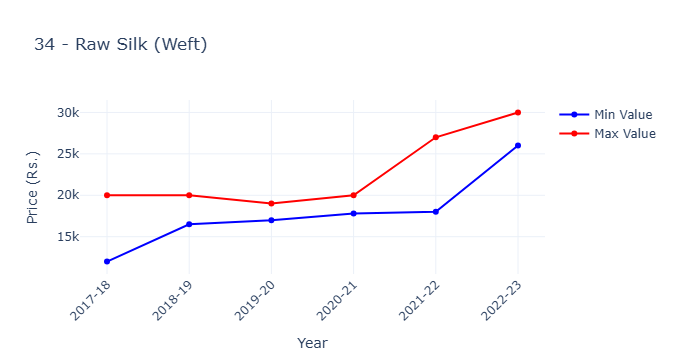

In [159]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
file_path = "D:/kaggle/silk prod india/Silk_Textile_Table_1.csv"
data = pd.read_csv(file_path)

# Function to split the range into min and max
def split_range(range_str):
    try:
        min_val, max_val = range_str.split('-')
        return float(min_val), float(max_val)
    except ValueError:
        # Handle cases where range_str might be a single value
        return float(range_str), float(range_str)

# List of year columns
year_columns = ['2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Specify the SL Nos. of interest
sl_nos_of_interest = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

# Filter data based on specified SL Nos.
filtered_data = data[data['Sl. No.'].isin(sl_nos_of_interest)]

# Prepare to store plots
plots = []

# Iterate through each filtered row and create a plot
for index, row in filtered_data.iterrows():
    # Split ranges into min and max values for each year
    min_values = []
    max_values = []
    for col in year_columns:
        min_val, max_val = split_range(row[col])
        min_values.append(min_val)
        max_values.append(max_val)
    
    # Create traces for min and max values
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=year_columns, y=min_values, mode='lines+markers', name='Min Value', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=year_columns, y=max_values, mode='lines+markers', name='Max Value', line=dict(color='red')))
    
    # Update layout for each plot
    fig.update_layout(
        title=f"{row['Sl. No.']} - {row['Particulars']}",
        xaxis_title='Year',
        yaxis_title='Price (Rs.)',
        xaxis=dict(tickangle=-45),
        template='plotly_white'
    )
    
    # Save the plot
    plots.append(fig)

# Display all plots
for plot in plots:
    plot.show()
